# problem statement=>  
#In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relations between features of mobile phones and its selling price. In this  we don't have to predict the actual price but a price range indicating how high the price is.

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set style
sns.set()

#setting font weight,labelweight,title weight to bold
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelweight"]="bold"
plt.rcParams["axes.titlesize"]=20
plt.rcParams["axes.titleweight"]="bold"
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=20
plt.rcParams['legend.fontsize']=15
plt.rcParams['legend.title_fontsize']=15

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/mobile /data_mobile_price_range.csv"

In [ ]:
mobile_price_data=pd.read_csv(file_path)

In [ ]:
mobile_price_data.shape

(2000, 21)

In [ ]:
# checking statistics
mobile_price_data.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

## some observations
# sc_width(screen width) min value is 0
#px_height min value is 0


# now we handle both the cases

In [ ]:
# checking how many screen has width 0
print(mobile_price_data[mobile_price_data['sc_w']==0].shape[0])

180


In [ ]:
#checking for how many observation having px_height=0
print(mobile_price_data[mobile_price_data['px_height']==0].shape[0])

2


In [ ]:
# since there are 2 observation with px_height equal 0 we will remove that
mobile_price_data=mobile_price_data[mobile_price_data['px_height']!=0]

In [ ]:
mobile_price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   int64  
 1   blue           1998 non-null   int64  
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   int64  
 4   fc             1998 non-null   int64  
 5   four_g         1998 non-null   int64  
 6   int_memory     1998 non-null   int64  
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   int64  
 9   n_cores        1998 non-null   int64  
 10  pc             1998 non-null   int64  
 11  px_height      1998 non-null   int64  
 12  px_width       1998 non-null   int64  
 13  ram            1998 non-null   int64  
 14  sc_h           1998 non-null   int64  
 15  sc_w           1998 non-null   int64  
 16  talk_time      1998 non-null   int64  
 17  three_g        1998 non-null   int64  
 18  touch_sc

In [ ]:
# Nearest neighbours imputations(KNN imputer) will use on 'sc_w' as there are many observations
# but before  using KNN imputer we need to replace 0 withy NAN values

In [ ]:
mobile_price_data['sc_w']=mobile_price_data['sc_w'].replace(0,np.nan)

In [ ]:
#import KNN imputer

from sklearn.impute import KNNImputer
impute_knn= KNNImputer(n_neighbors=1)
mobile_price_data=pd.DataFrame(impute_knn.fit_transform(mobile_price_data),columns=mobile_price_data.columns)

In [ ]:
#checking shape
mobile_price_data.shape

(1998, 21)

In [ ]:
# now check for 'sc_w'=0
mobile_price_data[mobile_price_data['sc_w']==0].shape[0]

0

# we have handled the mismatched values

In [ ]:
# check for null value in data set

mobile_price_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# no null value in the table

#=> EDA

lets have a look at target variable first

In [ ]:
price_range_values=mobile_price_data['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

we have almost equal number of observation in each category
0= low cost,
1= medium cost,
2=high cost,
3= very high cost

# correlation of target variables

<Axes: >

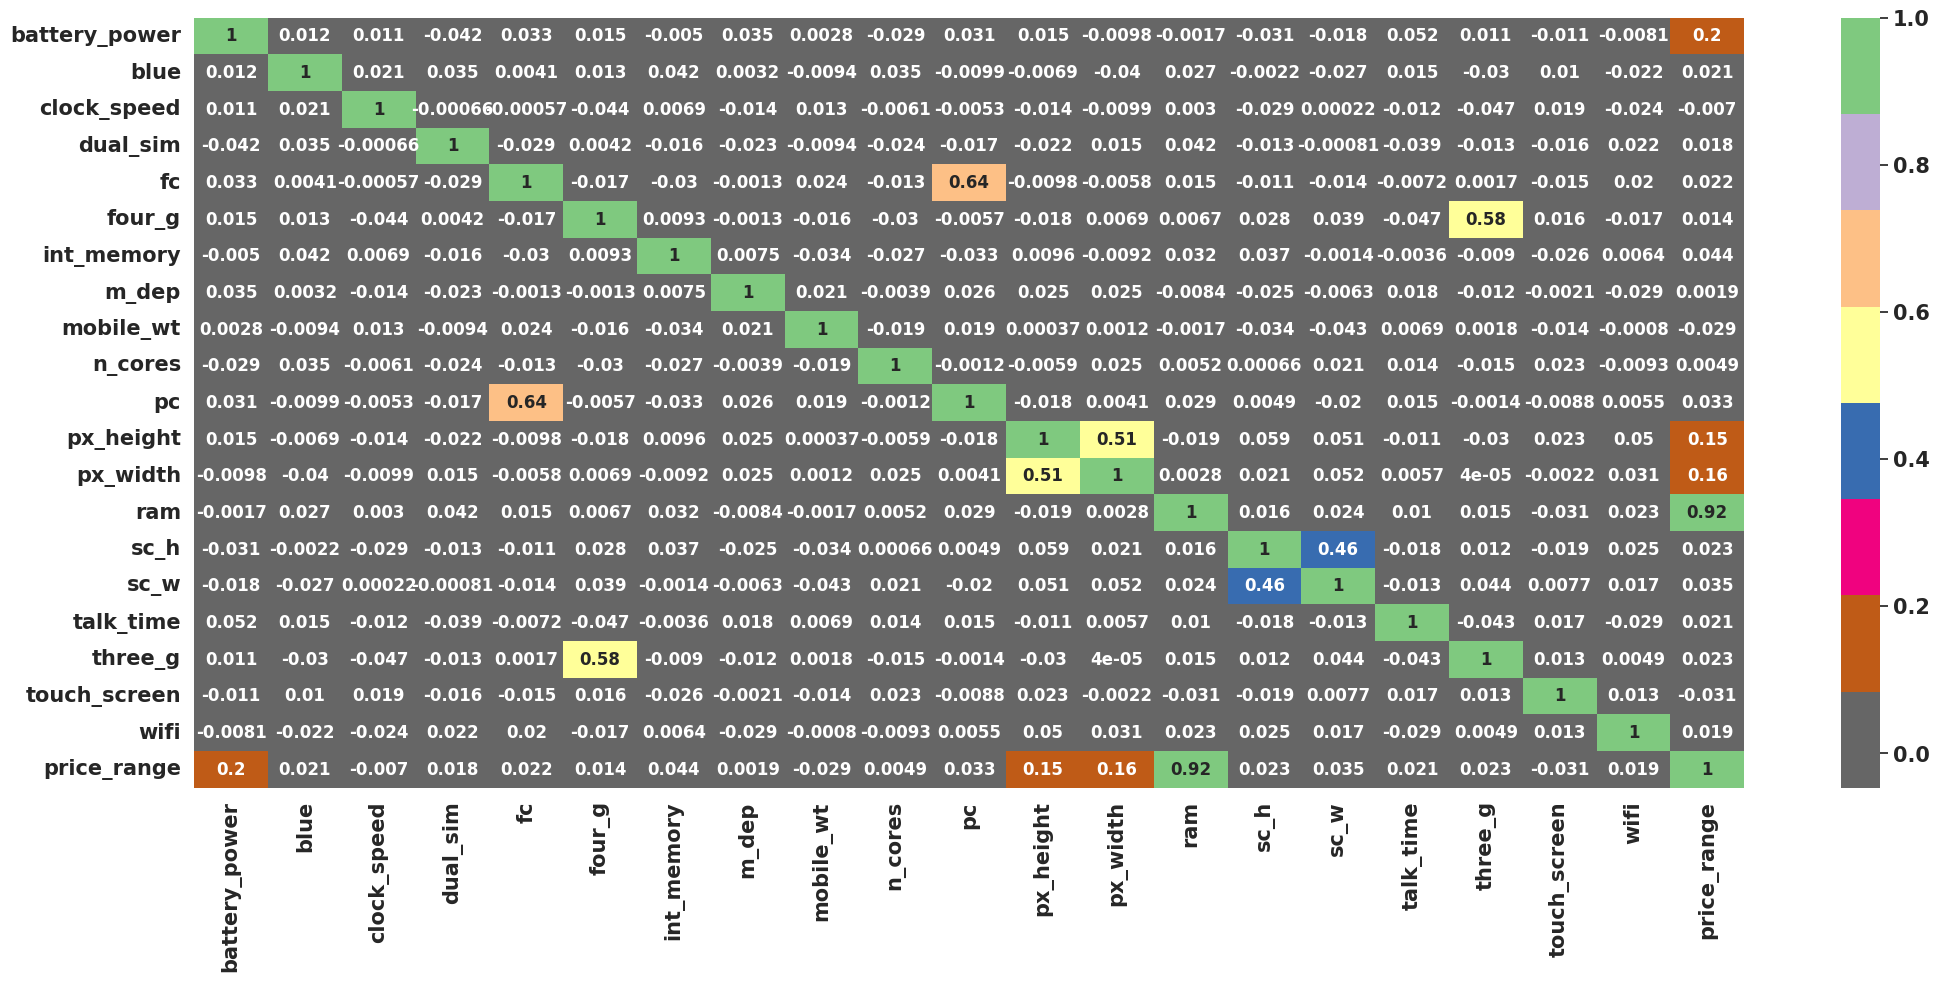

In [ ]:
corr=mobile_price_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

observation
*  ram has positive relation with price range
*  battery_power has positive correlation

*  px_height and px_width has positive connection
*  four_g and three_g has positive correlation
*  primary camera and front camera are positively correlated
*  sc_h and sc_w are positively correlated












In [ ]:
mobile_price_data.columns

lets check which numerical feature is driving the price range the most

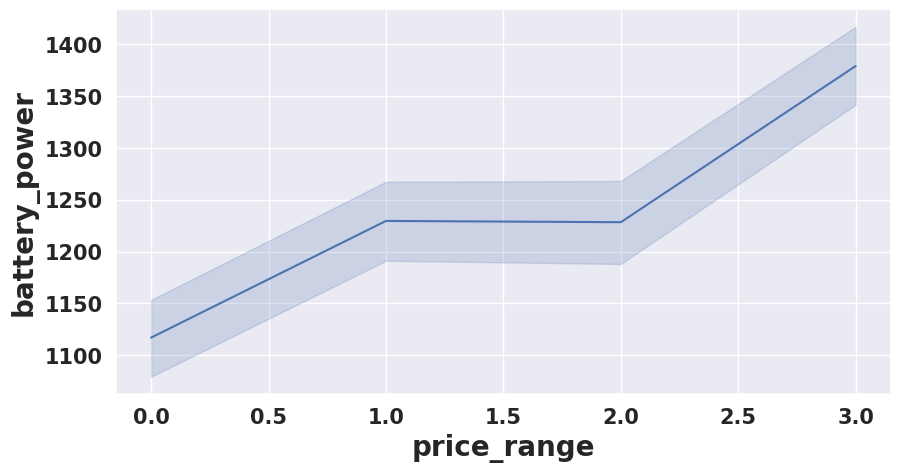

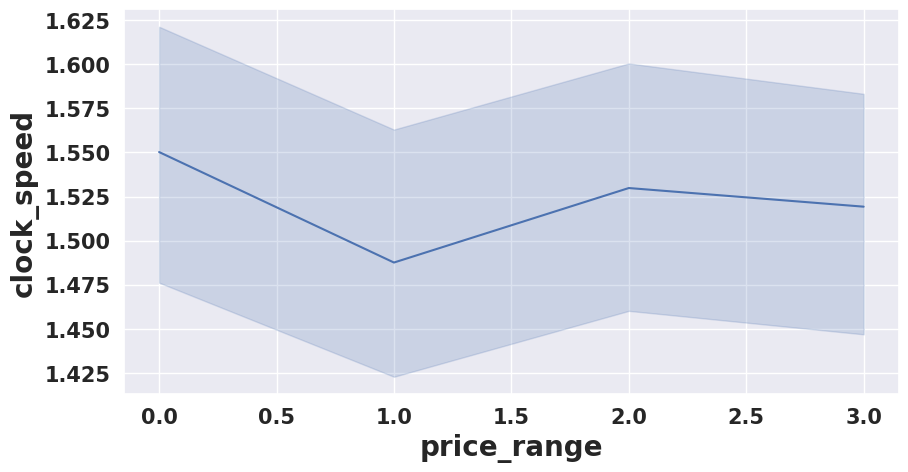

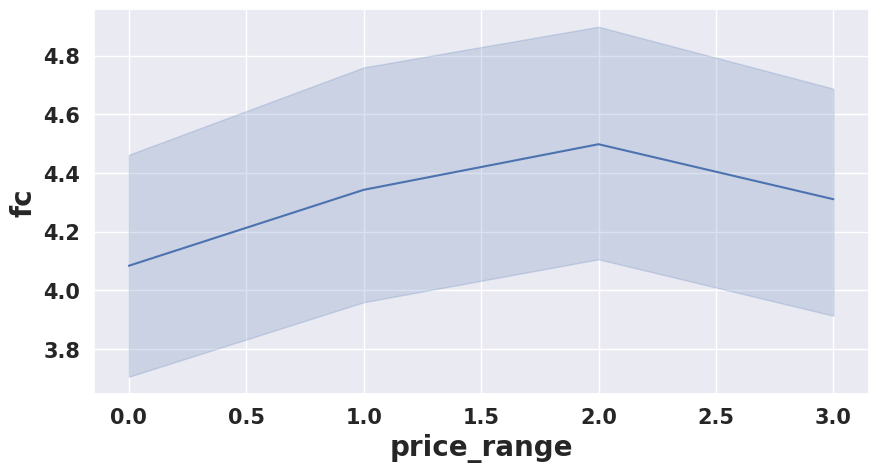

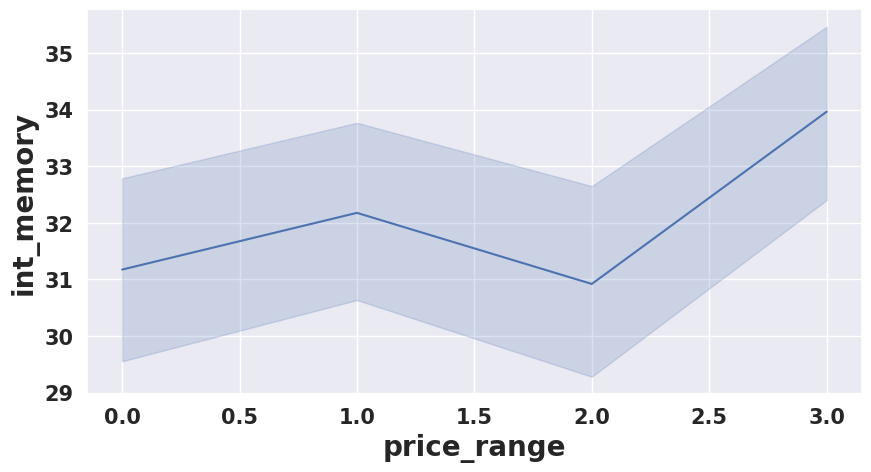

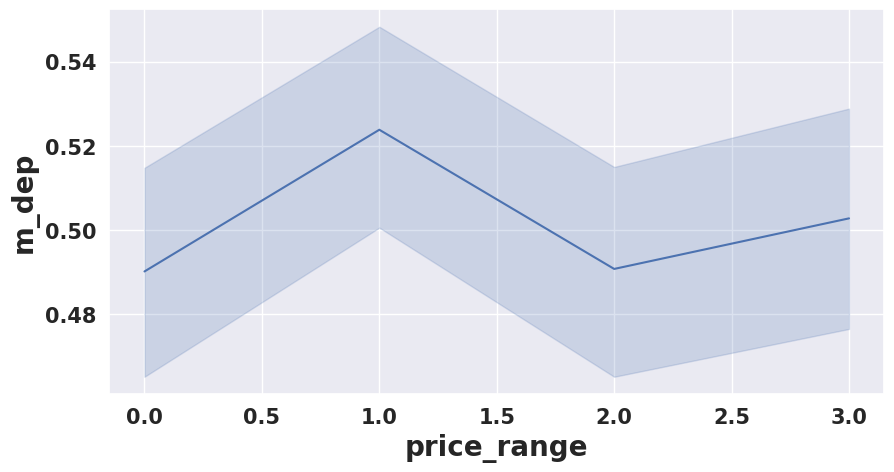

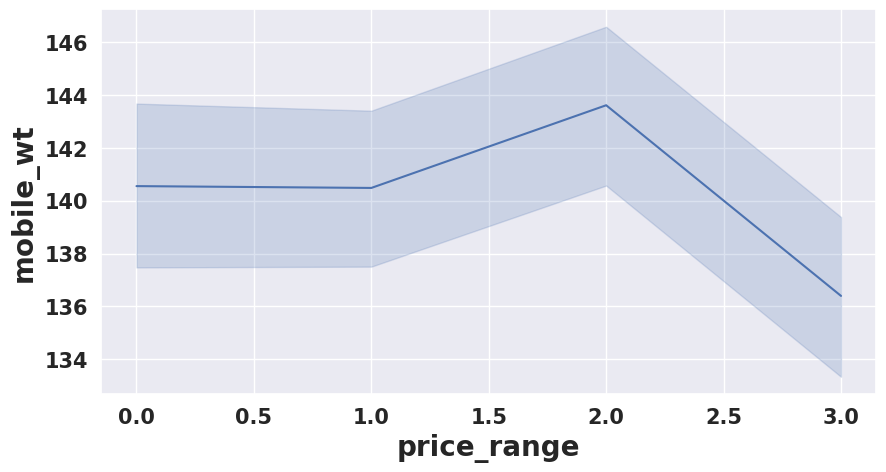

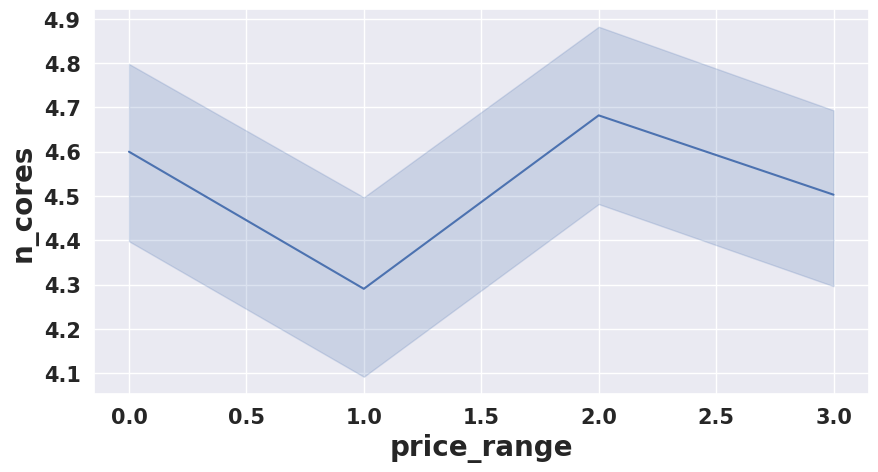

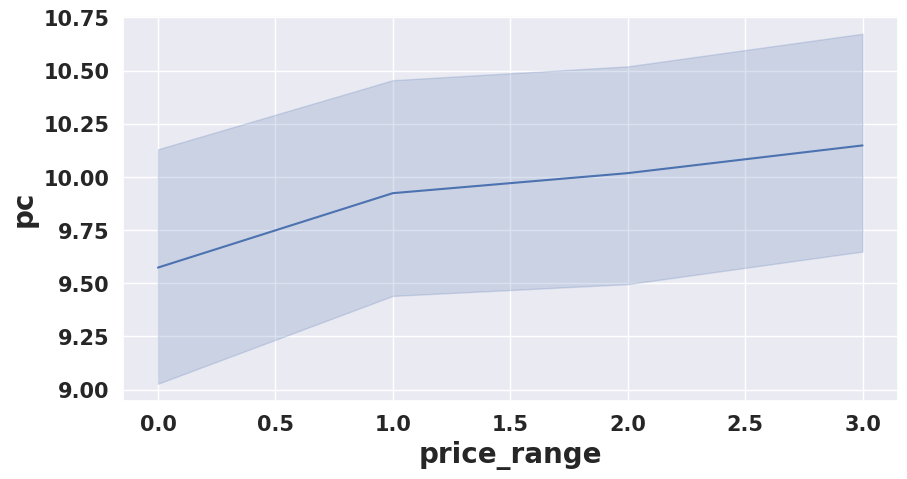

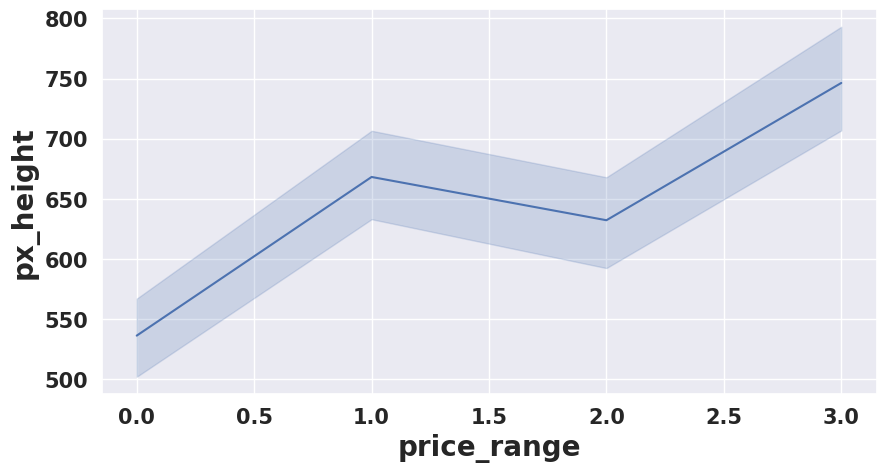

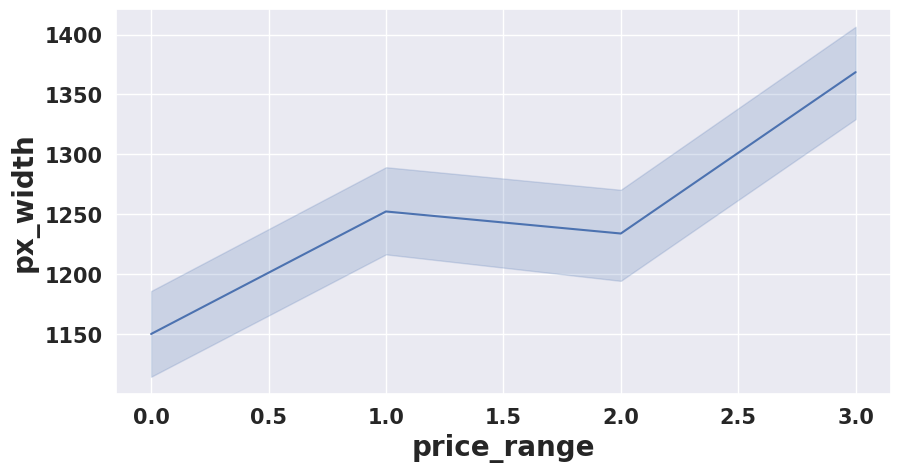

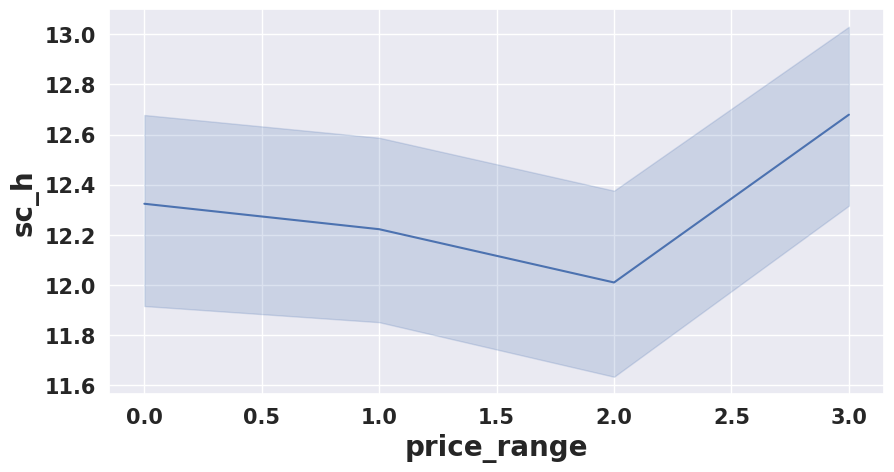

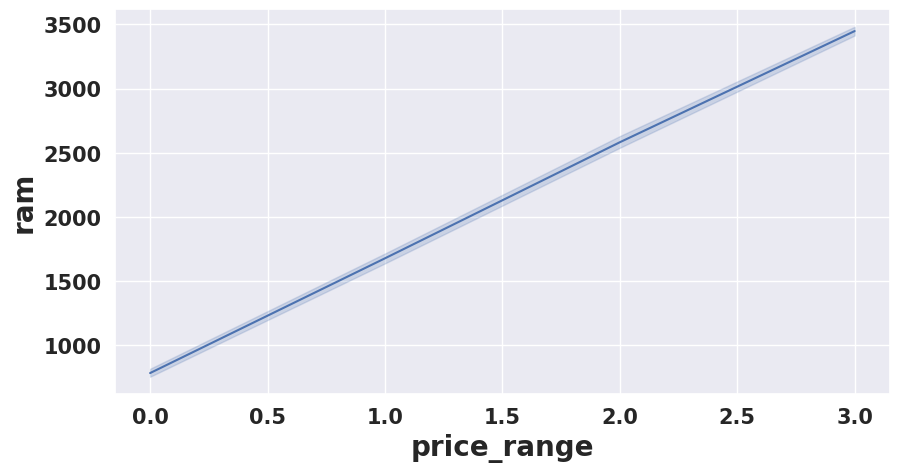

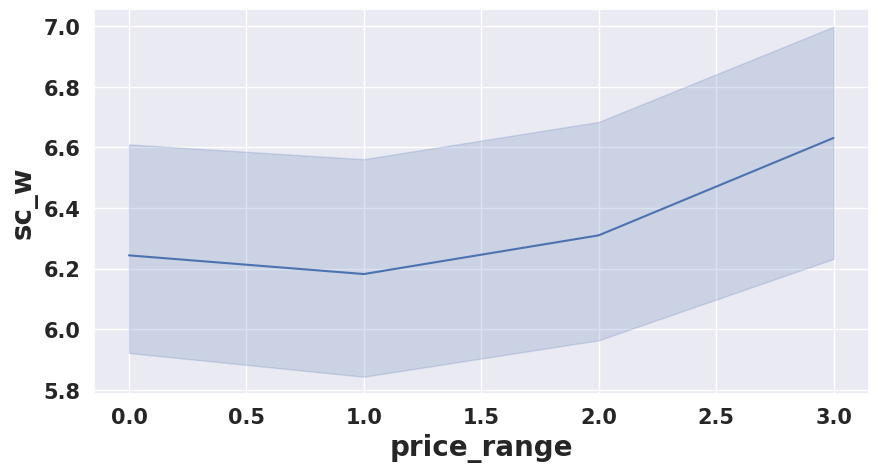

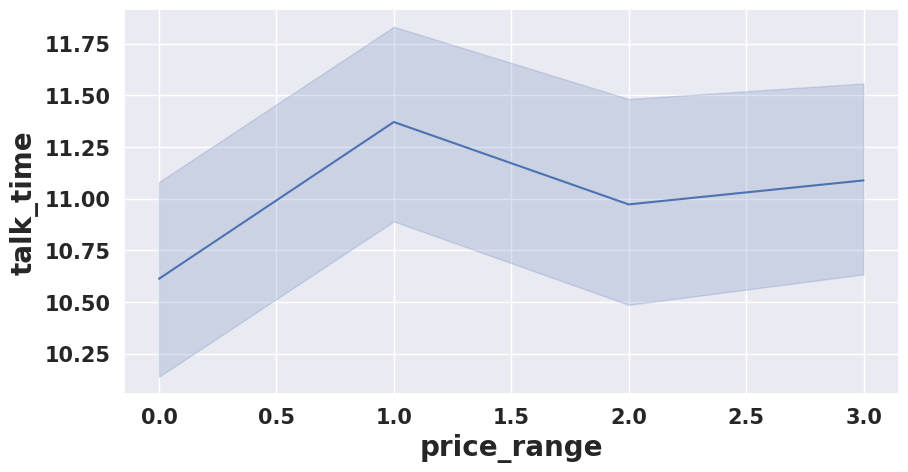

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
counter=1
for var in list_1:
  plt.figure(figsize=(10,5))
  sns.lineplot(x=mobile_price_data['price_range'],y=mobile_price_data[var])

*   as battery power increases price increases
*   mobile at high range has low weight

*   mobile having max screen width and height fall in high price category
*   List item






Let's Check the distribution of numerical columns and Outliers.


In [ ]:
mobile_price_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

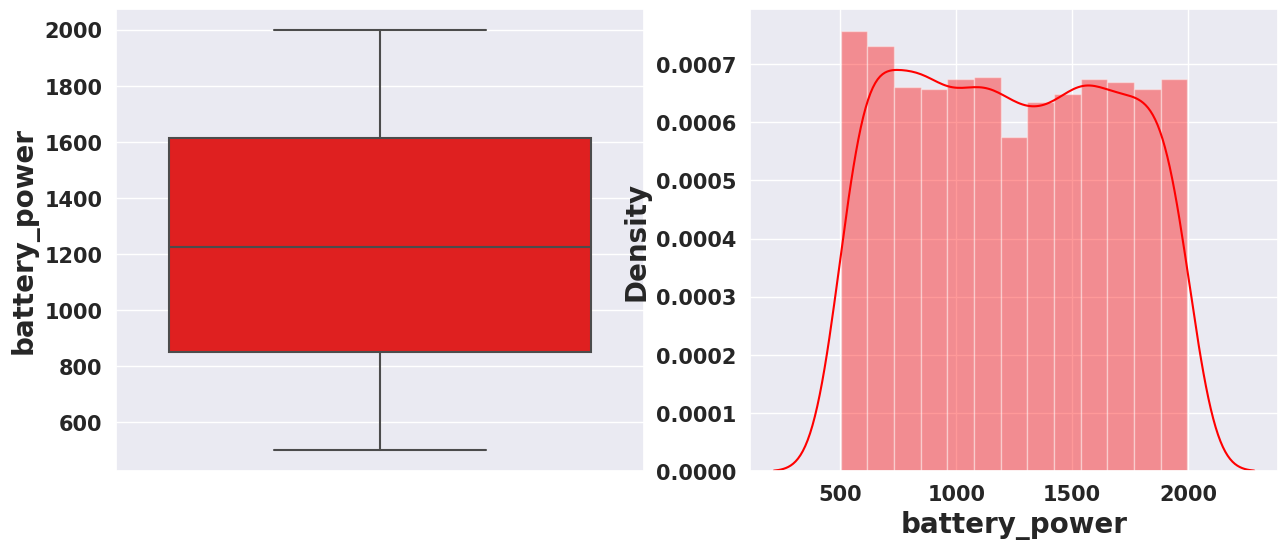

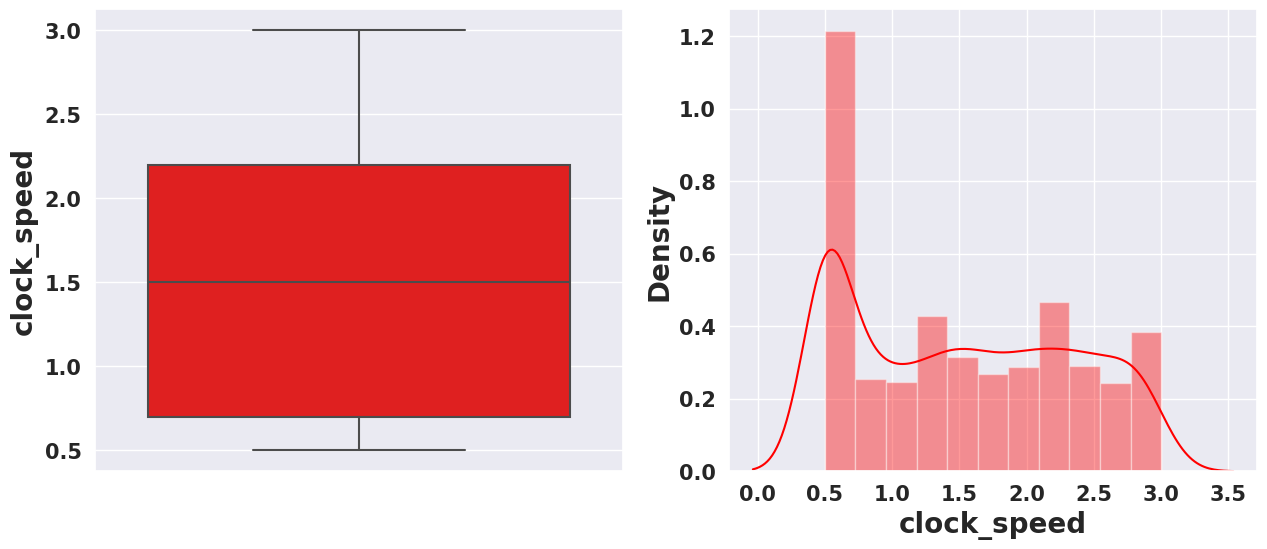

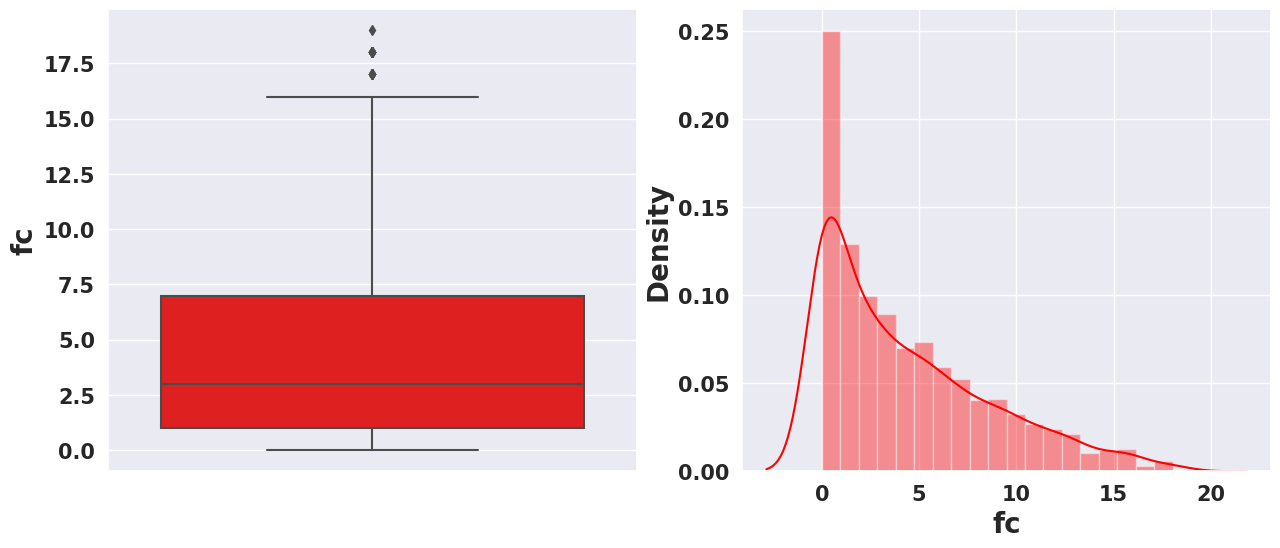

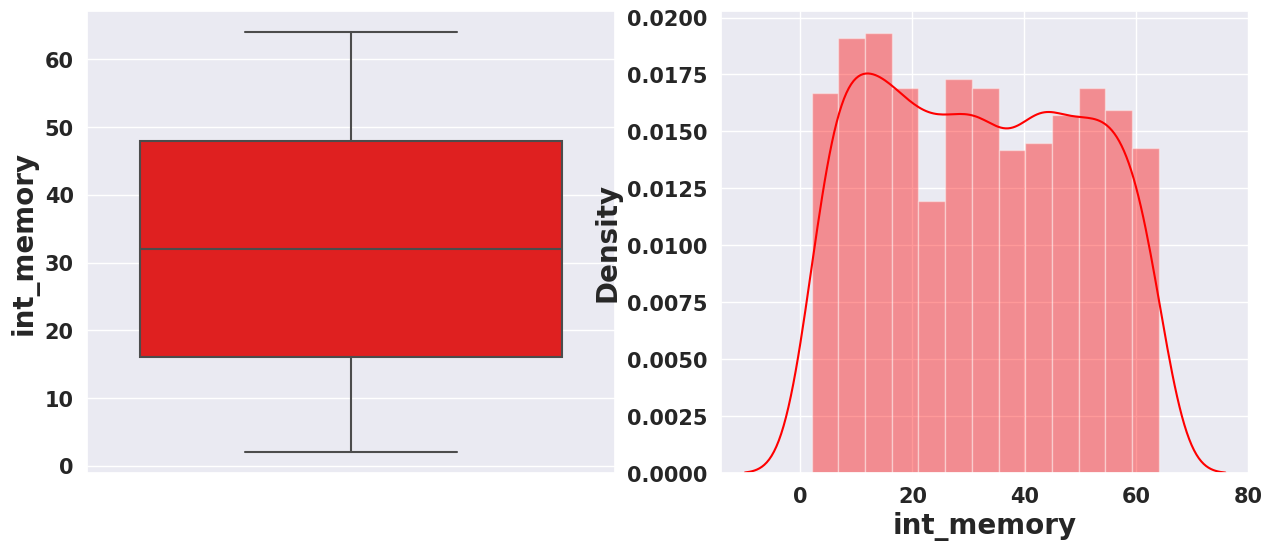

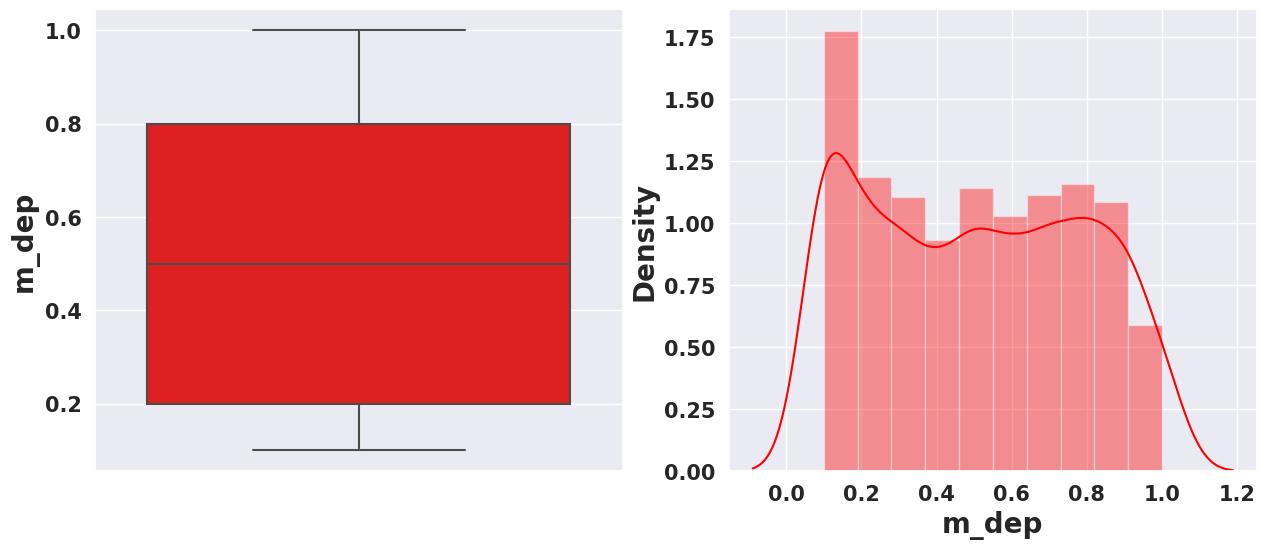

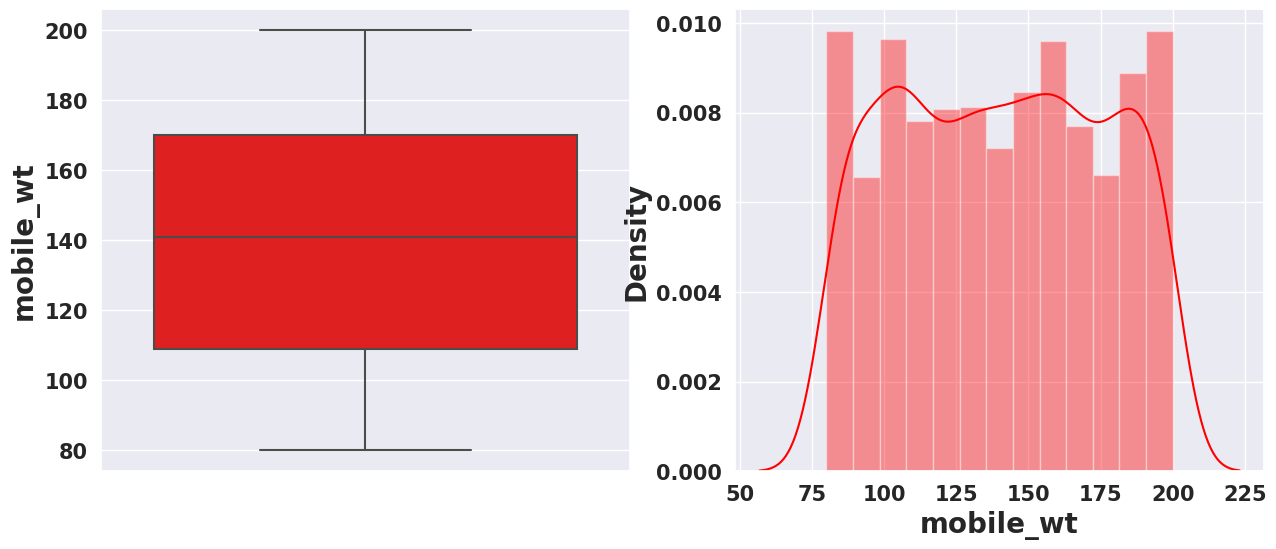

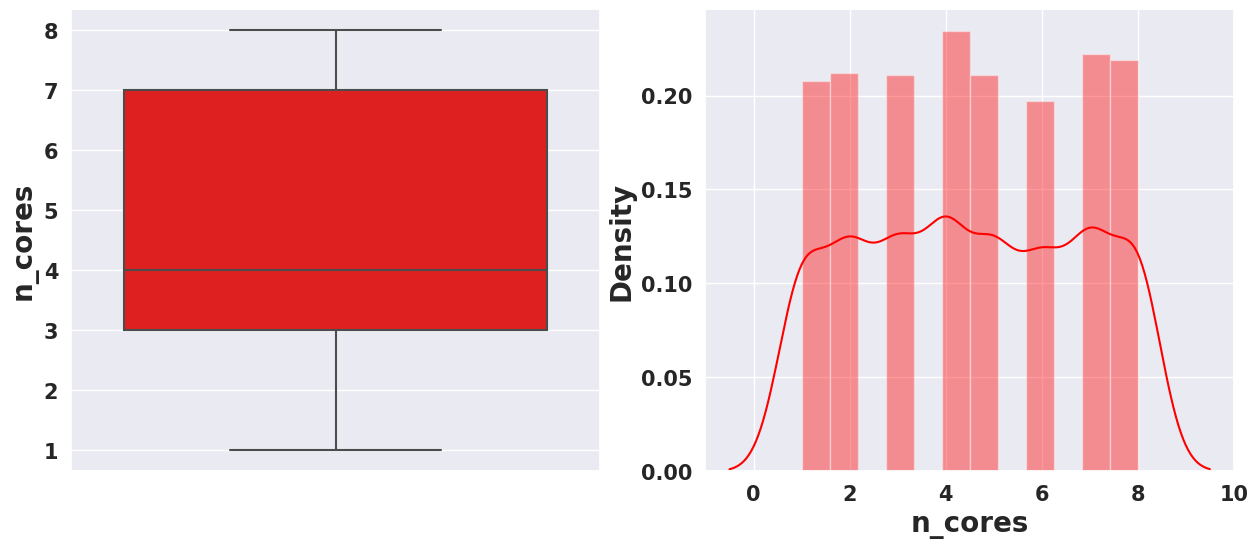

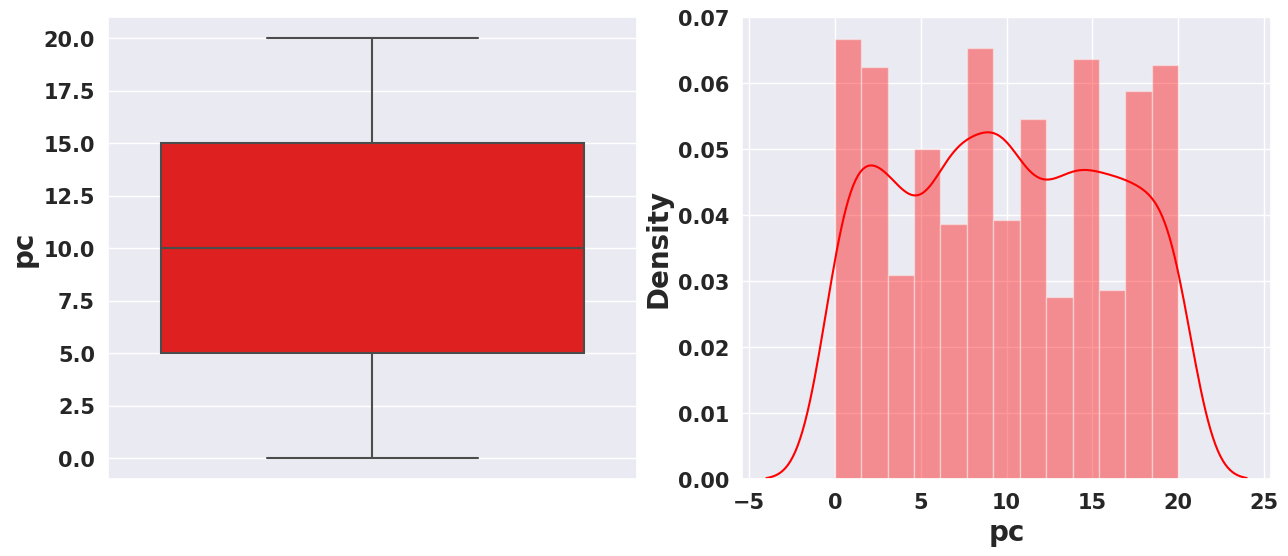

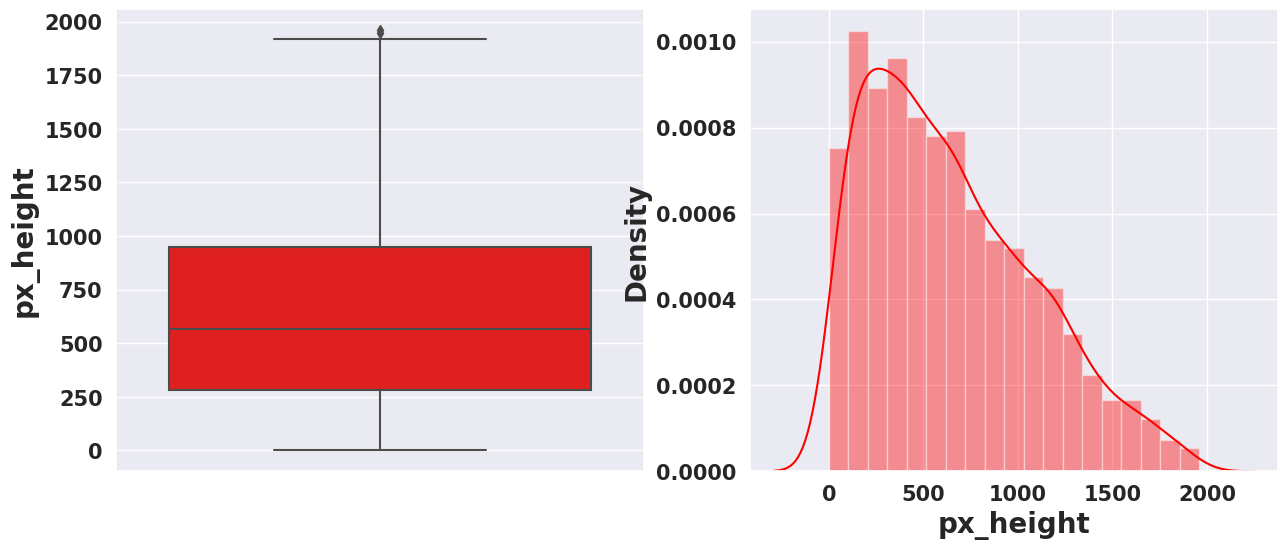

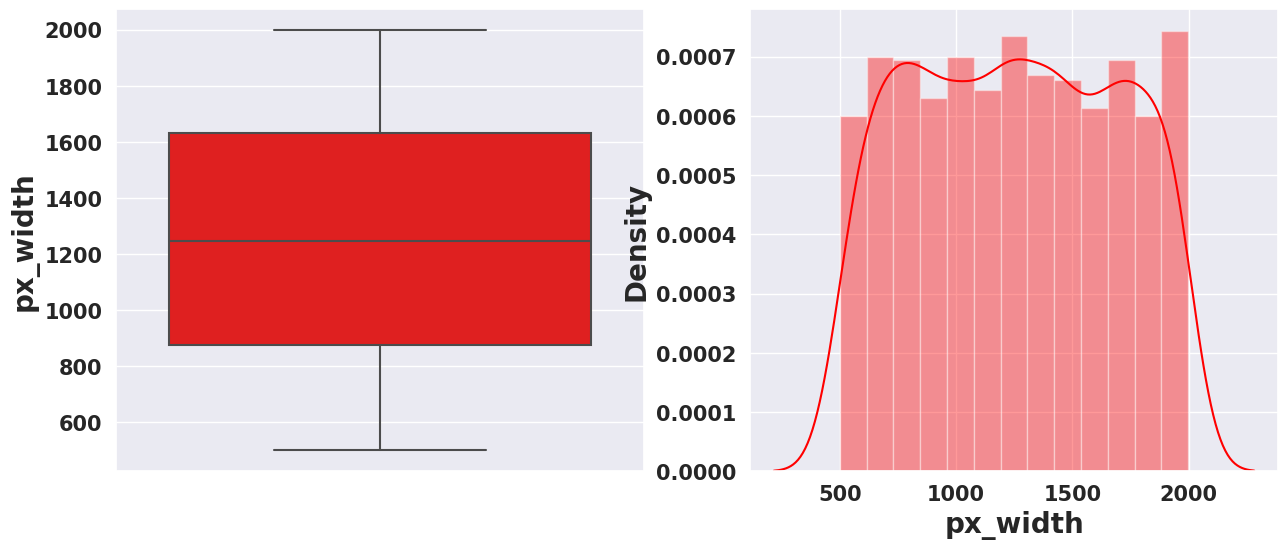

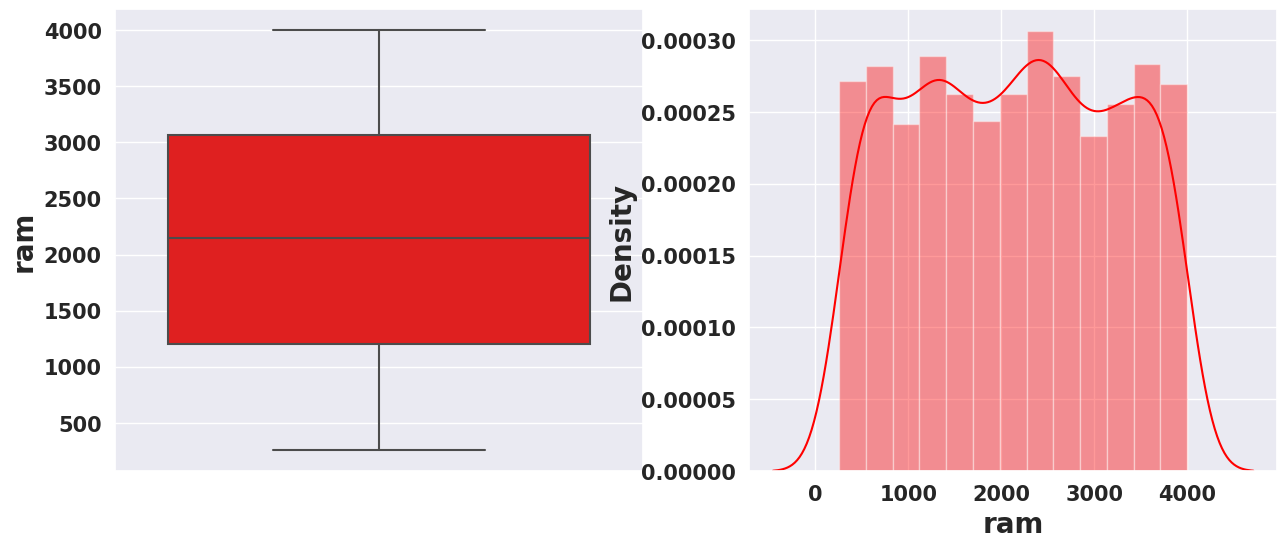

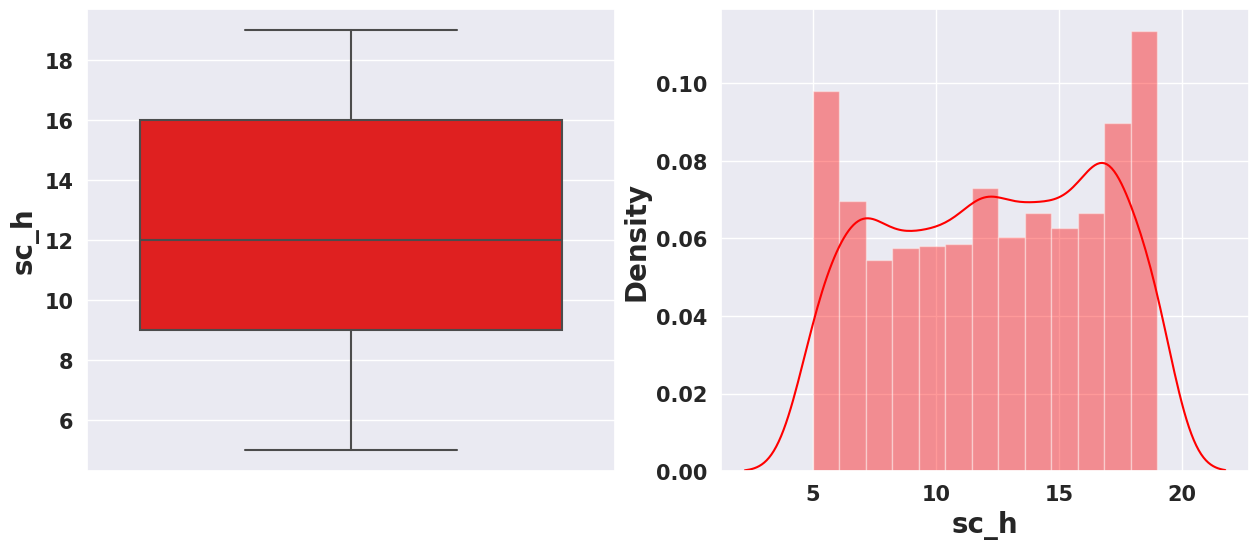

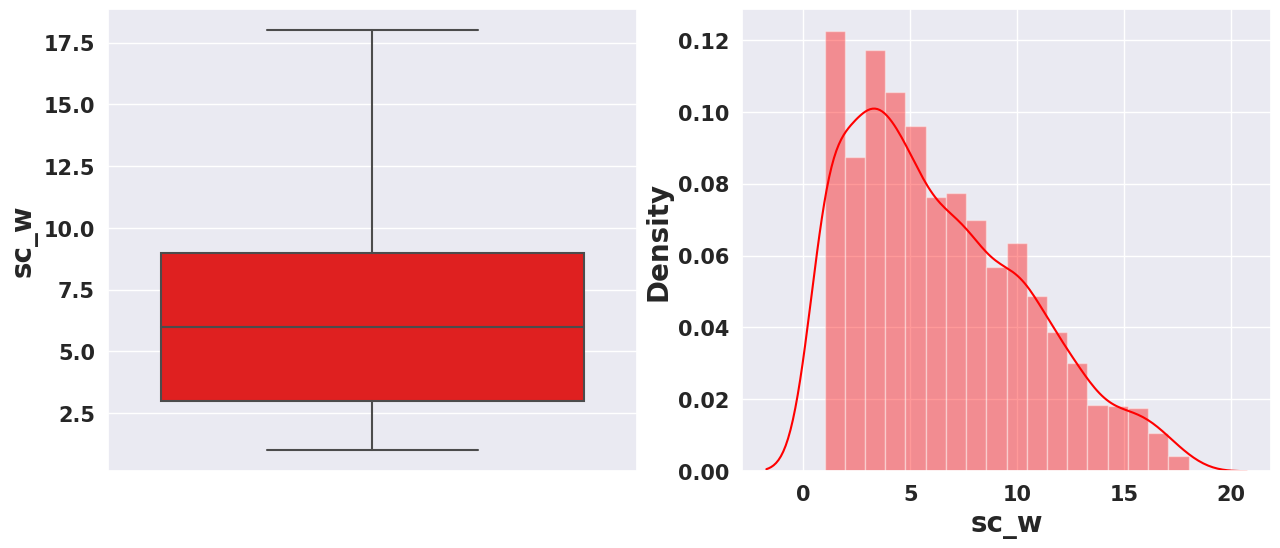

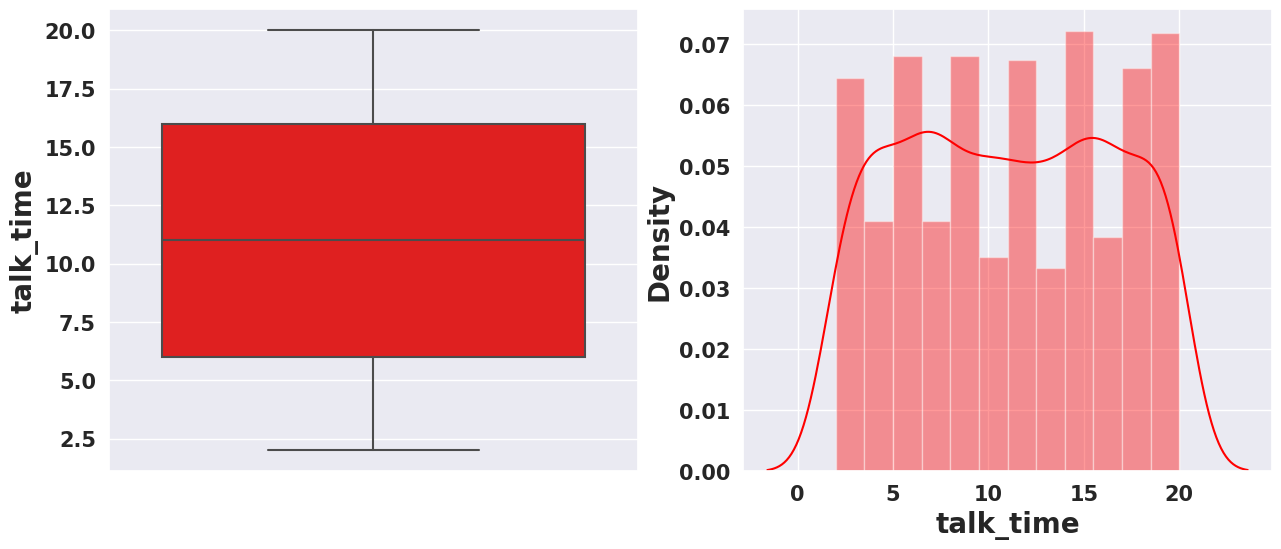

In [ ]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_price_data[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_price_data[var],color='red')

    fig.set_xlabel(var)

    plt.show()




*   fc and px_height has some outliers.





Outlier Treatment.

In [ ]:
Q1 = mobile_price_data["fc"].quantile(0.25)
Q3 = mobile_price_data['fc'].quantile(0.991)
IQR = Q3- Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_data = mobile_price_data[(mobile_price_data['fc'] <= Q3)]

In [ ]:
Q1 = mobile_price_data["px_height"].quantile(0.25)
Q3 = mobile_price_data['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
mobile_price_data = mobile_price_data[(mobile_price_data['px_height'] <= Q3)]

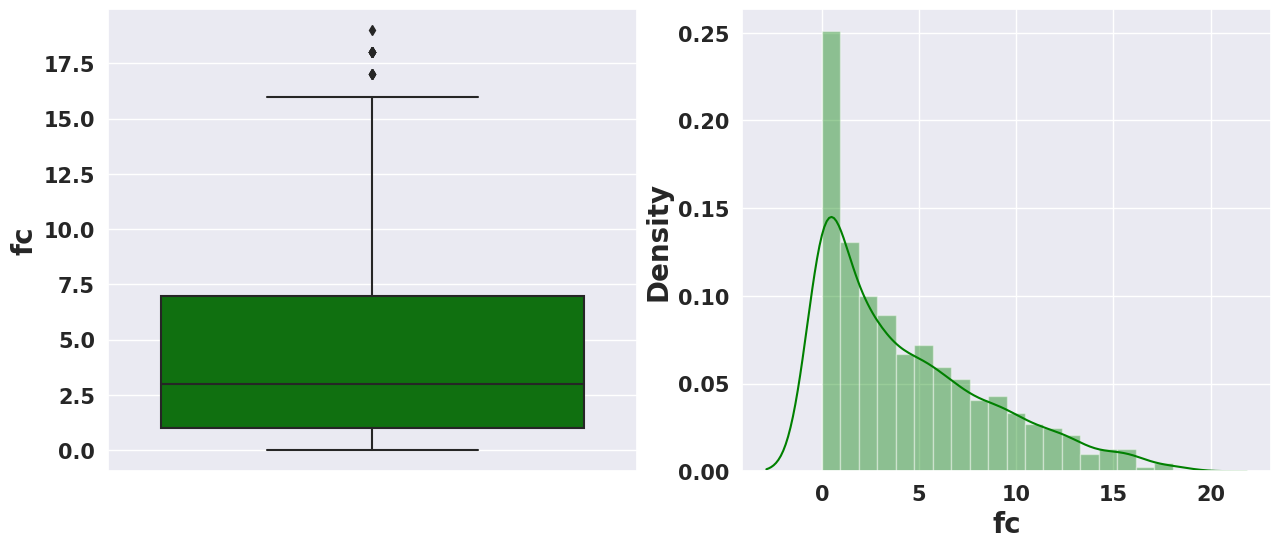

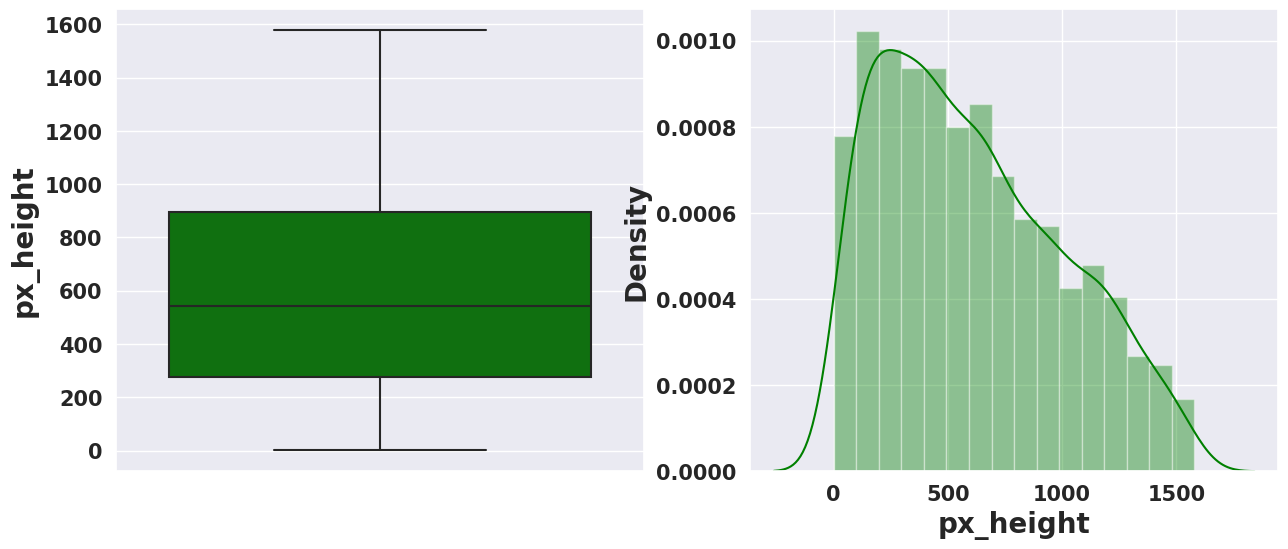

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=mobile_price_data[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(mobile_price_data[var],color='green')

    fig.set_xlabel(var)

    plt.show()


Thus we can see in box plot no oultiers are present.



In [ ]:
mobile_data.shape

Feature Selection

In [ ]:
# checking newly created column.
mobile_data.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0       19.0      0.0           0.0   1.0          1.0  
1        7.0      1.0           1.0   0.0          2.0  
2        9.0      1.0           1.0   0.0          2.0  
3       11.0      1.0           0.0   0.0          2.0  
4       15.0      1.0           1.0   0.0          1.0  

[5 rows x 21 columns]

<Axes: >

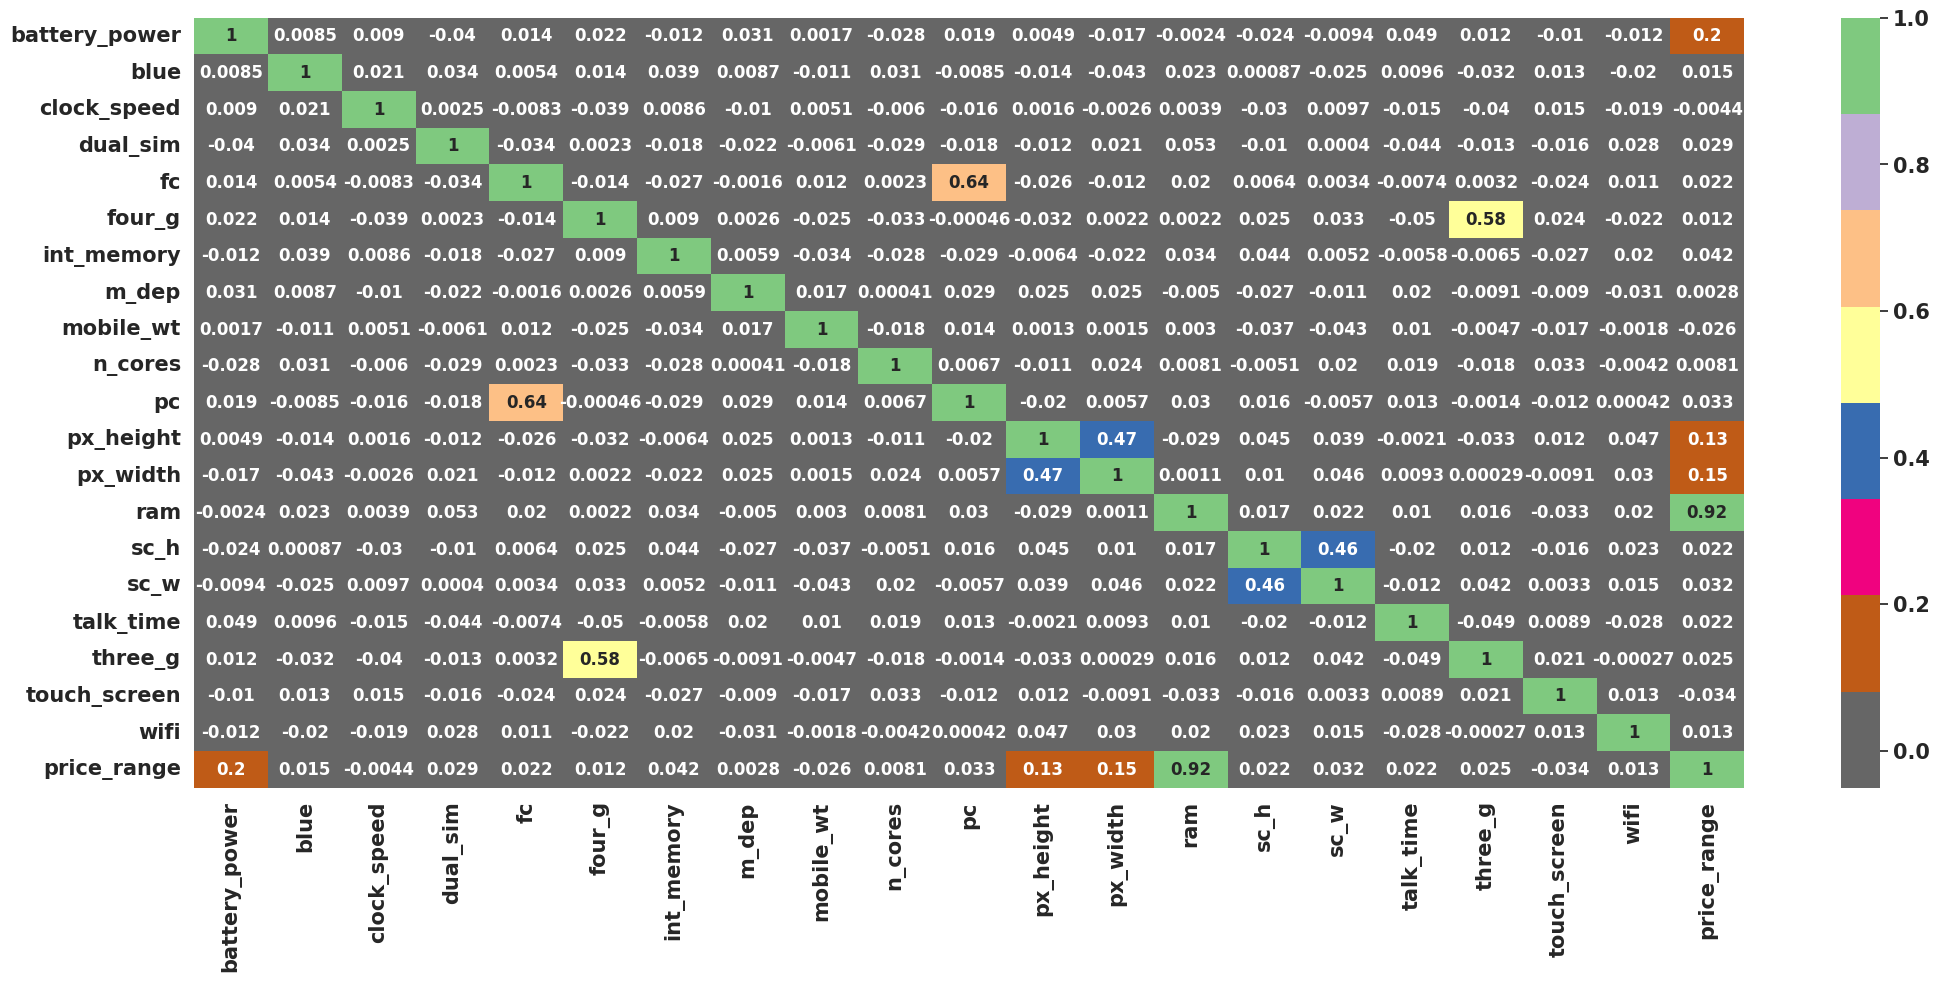

In [ ]:
corr= mobile_data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

In [ ]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=mobile_price_data.drop('price_range',axis=1)
y=mobile_price_data["price_range"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores

Specs          Score
0   battery_power   13006.330641
1            blue       0.547261
2     clock_speed       0.601599
3        dual_sim       1.350529
4              fc       8.614412
5          four_g       1.710471
6      int_memory      72.469287
7           m_dep       0.607471
8       mobile_wt      89.415217
9         n_cores       8.980105
10             pc       8.290684
11      px_height    9365.162736
12       px_width    7087.607193
13            ram  900997.524983
14           sc_h       8.719330
15           sc_w       6.297926
16      talk_time      15.228613
17        three_g       0.337439
18   touch_screen       1.875017
19           wifi       0.448872

In [ ]:
# 12 features with highest chi squared statistic
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  900997.524983
0   battery_power   13006.330641
11      px_height    9365.162736
12       px_width    7087.607193
8       mobile_wt      89.415217
6      int_memory      72.469287
16      talk_time      15.228613
9         n_cores       8.980105
14           sc_h       8.719330
4              fc       8.614412
10             pc       8.290684
15           sc_w       6.297926


In [ ]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=mobile_price_data[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=mobile_price_data['price_range']

Predictive Modeling:
Algorithms used for predictive modeling:

     
    Decision Tree
    Random Forest classifier
    Gradient Boosting Classifier
    K-nearest Neighbour classifier
    XG Boost Classifier
    Support Vector Machine(SVM)
As Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.

For K nearest Neighbors and SVM we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data. As these are distance based Algorithms



In [ ]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [ ]:

# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1444, 12)
(482, 12)
(1444,)
(482,)


In [ ]:


# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test



In [ ]:
X_train_scaled


array([[-1.70737483, -0.29678286, -1.55470542, ...,  2.73955084,
        -1.13085638,  1.16173354],
       [ 1.66215316, -0.30434079, -1.64618588, ...,  0.172747  ,
         0.62832122,  0.99692922],
       [-0.50749868,  0.76384583,  0.31607007, ...,  1.33947602,
        -1.57065078,  1.65614652],
       ...,
       [ 1.03799398, -0.2136457 , -0.82514872, ..., -0.99398202,
         1.06811562, -1.14552703],
       [-0.8177151 , -0.61169637,  0.00503649, ..., -0.76063622,
         0.18852682,  1.16173354],
       [ 0.96998858, -1.31458332, -1.29627311, ..., -0.99398202,
        -1.13085638, -1.47513568]])

In [ ]:
X_test_scaled

array([[-0.78231503, -1.23144615, -0.52097617, ...,  0.6394386 ,
        -1.57065078,  0.00810326],
       [ 1.02029394, -1.17602138,  1.15540333, ..., -0.99398202,
         0.62832122, -1.63994   ],
       [ 0.16976061, -0.06752583,  0.48302192, ...,  1.57282182,
         1.50791002,  1.16173354],
       ...,
       [-1.55273241,  1.60781403, -0.37460743, ..., -0.52729041,
         1.06811562,  1.32653787],
       [ 0.64673002, -0.31189871,  0.75975032, ..., -0.99398202,
         1.06811562, -0.15670107],
       [ 1.43205269, -1.09288421,  1.50760312, ...,  0.172747  ,
        -1.57065078,  0.00810326]])

In [ ]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # plotting
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);




In [ ]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

#1) Decision Tree Classifier:

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. So here we will use X_train,X_test,y_test and Y_train which are not scaled.

*Decision Tree with default hyperparameters:

In [ ]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)

In [ ]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)


In [ ]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8236514522821576

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[110,  18,   0,   0],
       [  8, 104,  17,   0],
       [  0,   6,  81,  14],
       [  0,   0,  22, 102]])

In [ ]:
# plotting confusion matrix for test set.
predictions = dtc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=dtc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Class_cat)

disp.plot()
plt.show()



In [ ]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       350
         2.0       1.00      1.00      1.00       384
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



In [ ]:
# printing classification of test set.
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       128
         1.0       0.81      0.81      0.81       129
         2.0       0.68      0.80      0.73       101
         3.0       0.88      0.82      0.85       124

    accuracy                           0.82       482
   macro avg       0.82      0.82      0.82       482
weighted avg       0.83      0.82      0.83       482



    *Train set accuracy is 100% and test accuracy is 82%.

    *Model is overfitted on train set and did not generalised well.*
    *We will tune hyperparamters to reduce overfitting and try to imporve the model performance.

In [ ]:
##  Let's tune some hypereparameters of Decsion Tree classifier


# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.280 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.249 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.266 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.291 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.281 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.201 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.308 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=0)

In [ ]:

# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:

# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)


In [ ]:

# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.96398891966759

In [ ]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8547717842323651

In [ ]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[118,  10,   0,   0],
       [ 11, 107,  11,   0],
       [  0,  16,  76,   9],
       [  0,   0,  13, 111]])

In [116]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       368
         1.0       0.95      0.95      0.95       350
         2.0       0.96      0.93      0.95       384
         3.0       0.96      0.98      0.97       342

    accuracy                           0.96      1444
   macro avg       0.96      0.96      0.96      1444
weighted avg       0.96      0.96      0.96      1444



In [117]:

# printing classification report for test set.
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       128
         1.0       0.80      0.83      0.82       129
         2.0       0.76      0.75      0.76       101
         3.0       0.93      0.90      0.91       124

    accuracy                           0.85       482
   macro avg       0.85      0.85      0.85       482
weighted avg       0.86      0.85      0.85       482



In [118]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and
  plots the feature importance graph'''

  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

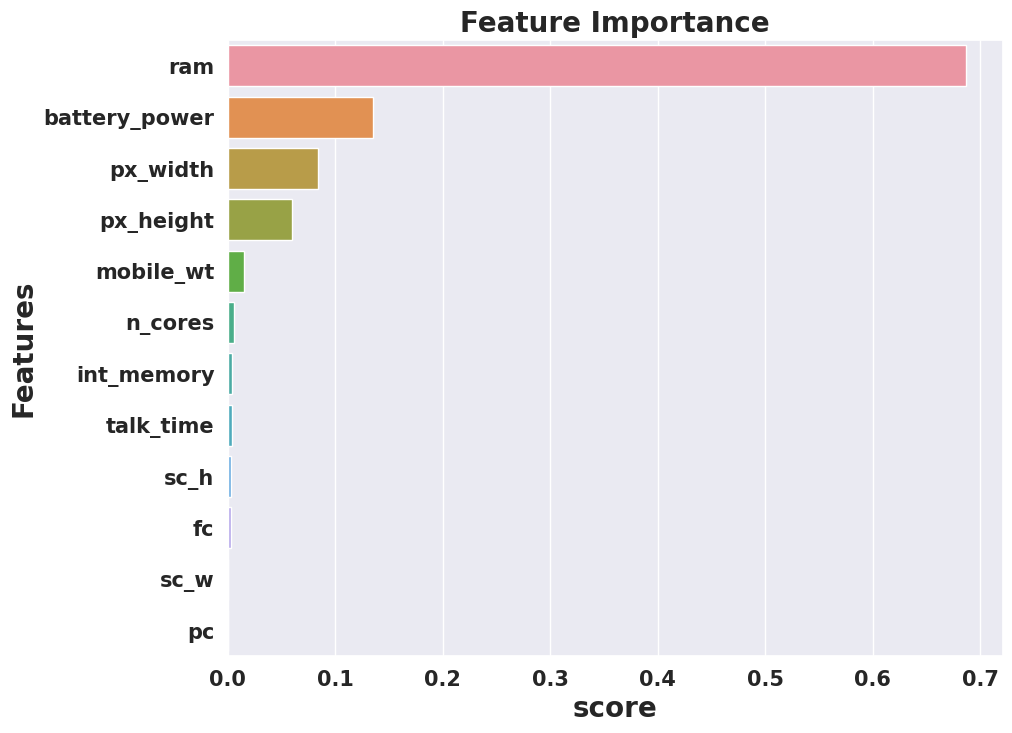

In [119]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

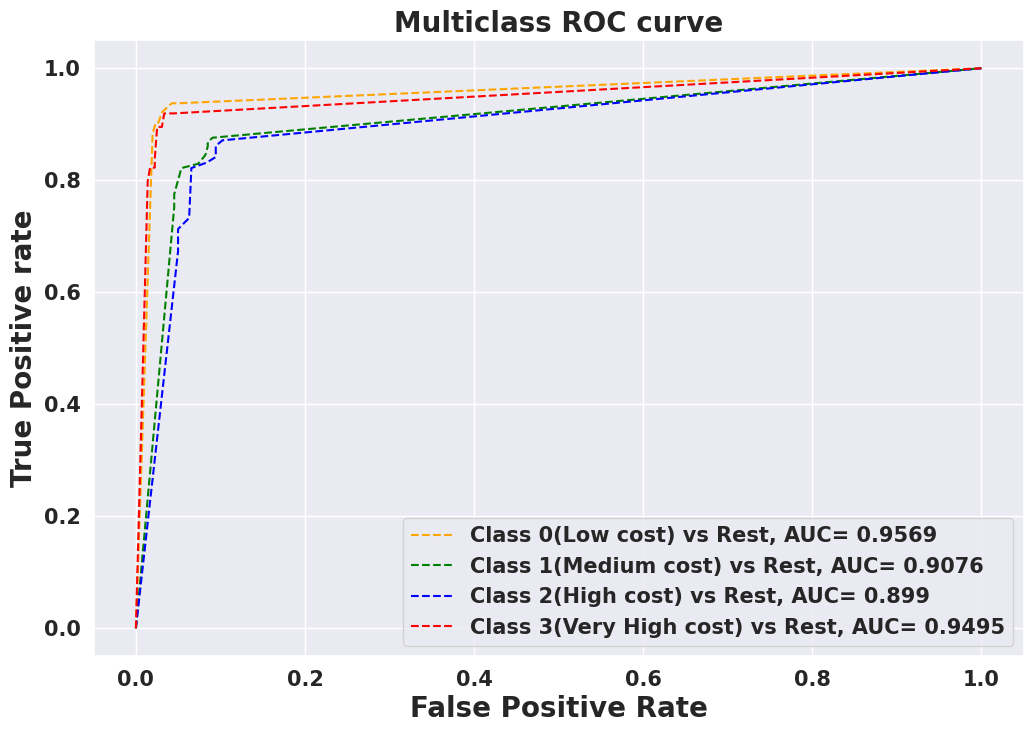

In [120]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

# Decision Tree Classifier-Observations:

    Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.*

    *RAM,battery power,px_height and width came out to be the most important featrures*

    *This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.*

# 2) Random Forest classifier:


In [121]:
# With default hyperparamters:


# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [122]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [123]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [124]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [125]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [126]:

# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.9149377593360996

In [127]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[120,   8,   0,   0],
       [  9, 112,   8,   0],
       [  0,   8,  88,   5],
       [  0,   0,   3, 121]])

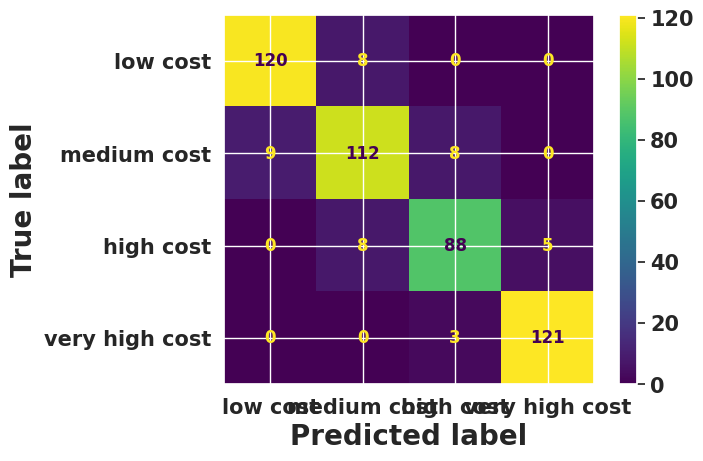

In [128]:
# plotting confusion matrix for test set.
predictions = rfc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rfc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Class_cat)

disp.plot()
plt.show()



In [129]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       350
         2.0       1.00      1.00      1.00       384
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



In [130]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       128
         1.0       0.88      0.87      0.87       129
         2.0       0.89      0.87      0.88       101
         3.0       0.96      0.98      0.97       124

    accuracy                           0.91       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.91      0.91      0.91       482



    *Train accuarcy is 100% and test accuracy is 91%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.

    *we do some hyperparameter tunning to reduce overfitting

# Let's do some Hyperparamter Tunning of the Random forest model

In [131]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']

             }

In [132]:
# creating the instance
rfc_= RandomForestClassifier(random_state=0)

In [133]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.880 total time=   1.1s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.879 total time=   1.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.892 total time=   0.8s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.873 total time=   1.1s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.884 total time=   1.0s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.902 to

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [134]:
#Getting best paramters for the models
rfc_tune.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 700}

In [135]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=6, n_estimators=700, random_state=0)

In [136]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)


In [137]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [138]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.9149377593360996

In [139]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[122,   6,   0,   0],
       [  9, 111,   9,   0],
       [  0,   9,  88,   4],
       [  0,   0,   4, 120]])

In [140]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       350
         2.0       1.00      1.00      1.00       384
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



In [141]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       128
         1.0       0.88      0.86      0.87       129
         2.0       0.87      0.87      0.87       101
         3.0       0.97      0.97      0.97       124

    accuracy                           0.91       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.91      0.91      0.91       482



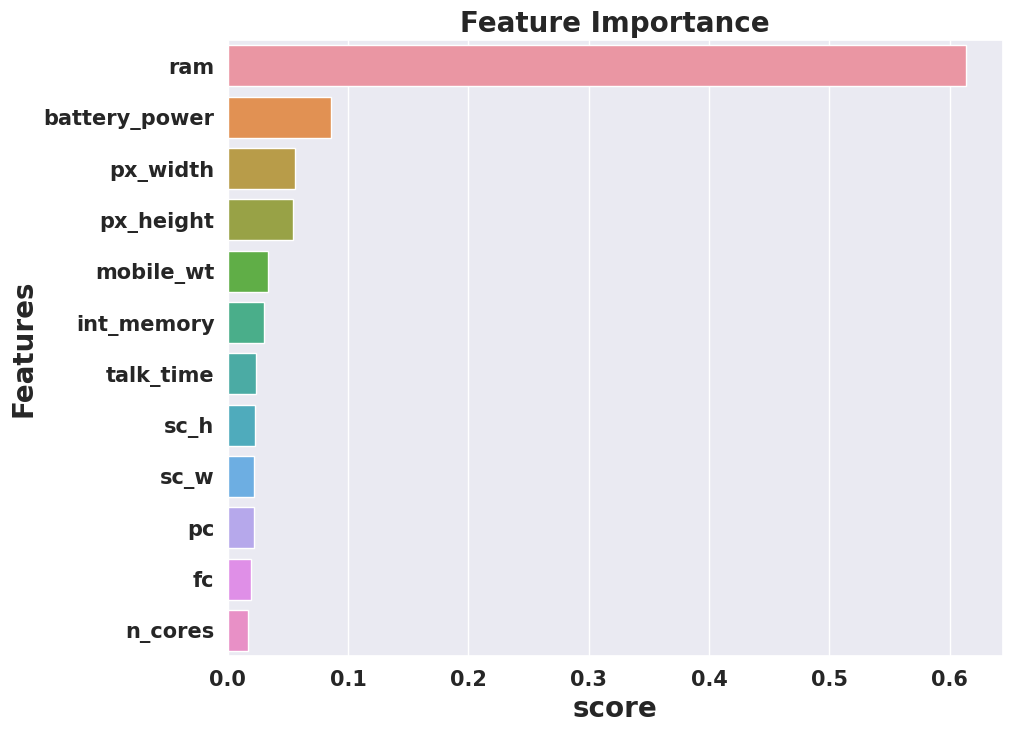

In [142]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

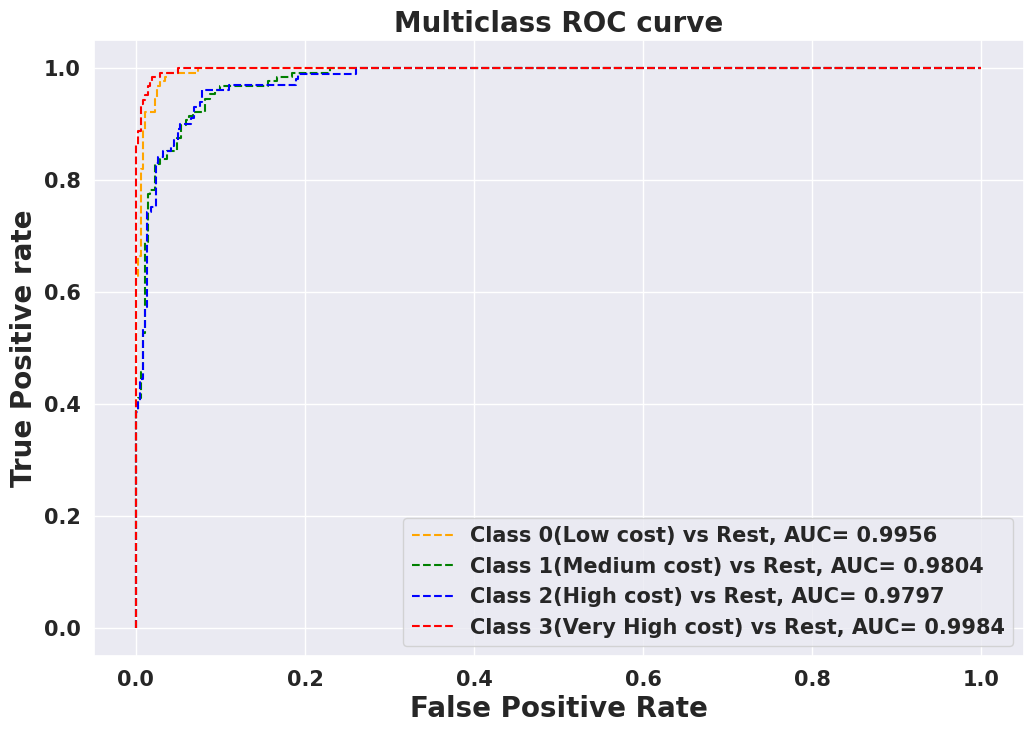

In [144]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

# observation of random forest
 before tuning

*   training accuracy= 100
*   test accuracy= 91.4


 after tuning

*   training accuracy= 100
*   test accuracy= 91

 *From roc curve its clear that model has poorly performed to classify class 1 and class 2.





# 3)Gradient Boosting Classifier:

  With default hyperparameters:With default hyperparameters:

In [145]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [146]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)


In [147]:
# fittng/training the data.
gbc.fit(X_train,y_train)


GradientBoostingClassifier(random_state=0)

In [148]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [149]:

# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

1.0

In [150]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.8962655601659751

In [151]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[118,  10,   0,   0],
       [  8, 115,   6,   0],
       [  0,  10,  84,   7],
       [  0,   0,   9, 115]])

In [152]:

# printing the classification report for train set
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       350
         2.0       1.00      1.00      1.00       384
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



In [153]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       128
         1.0       0.85      0.89      0.87       129
         2.0       0.85      0.83      0.84       101
         3.0       0.94      0.93      0.93       124

    accuracy                           0.90       482
   macro avg       0.89      0.89      0.89       482
weighted avg       0.90      0.90      0.90       482



Let's do some hyperparameter tuning.

In [154]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [157]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)

             }

In [158]:

# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [159]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 16}

In [160]:
# getting best estimators
gbc_tune.best_estimator_


GradientBoostingClassifier(learning_rate=1, min_samples_split=16,
                           random_state=0)

In [161]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=25,
                           random_state=0)

In [162]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)
y_pred=gbc_optimal.predict(X_test)

In [163]:

# train set accuracy score
accuracy_score(y_train,y_train_pred)


1.0

In [164]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.9149377593360996

In [165]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   7,   0,   0],
       [  7, 118,   4,   0],
       [  1,   9,  85,   6],
       [  0,   0,   7, 117]])

In [166]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       350
         2.0       1.00      1.00      1.00       384
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



In [167]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       128
         1.0       0.88      0.91      0.90       129
         2.0       0.89      0.84      0.86       101
         3.0       0.95      0.94      0.95       124

    accuracy                           0.91       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.92      0.91      0.91       482



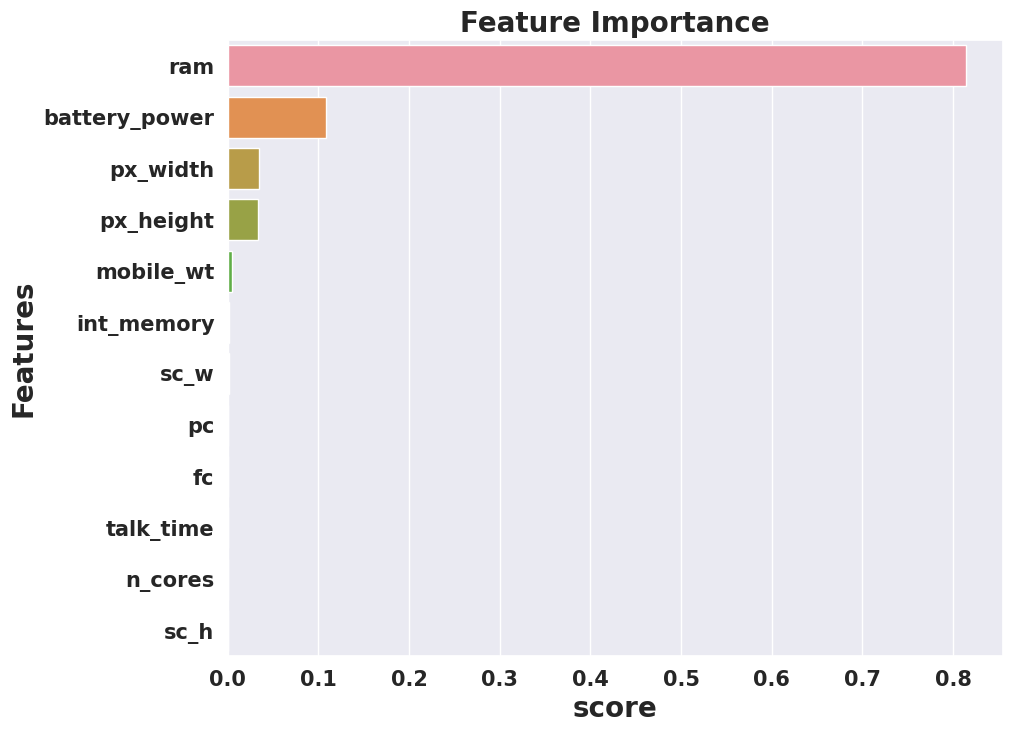

In [168]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

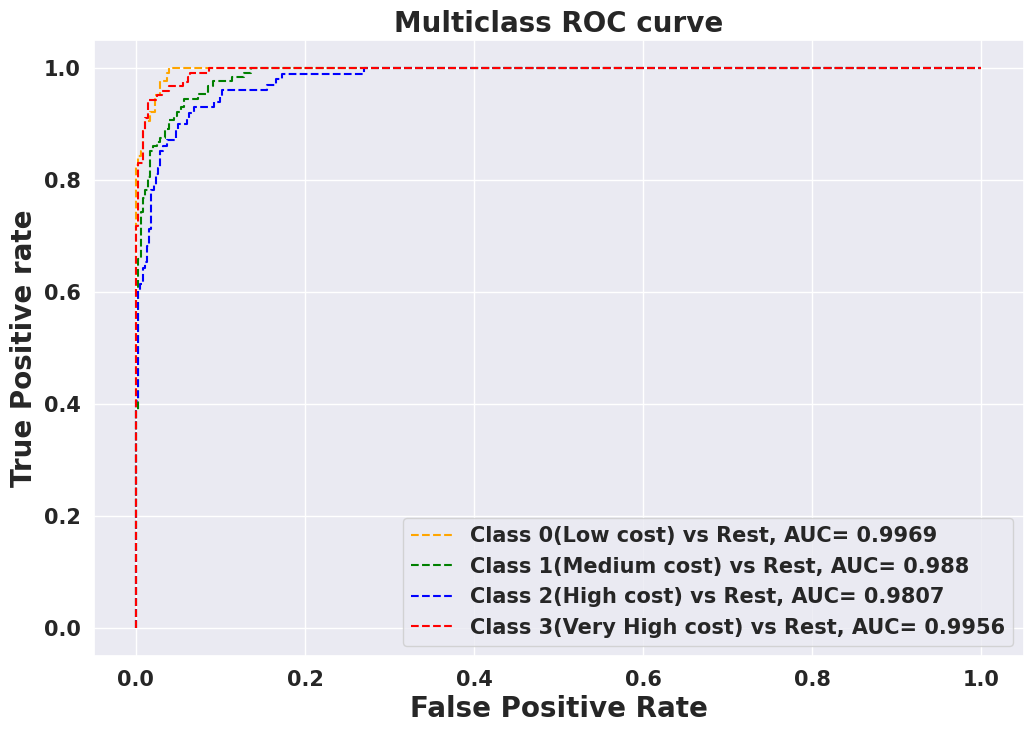

In [169]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

## Observations of Gradient Boost Classifiers:
*Before tunning:*

*   Train accuracy score= 100%.
*   Test accuracy score= 89%*

*Model did not generalised well and overfitted the training data.* *so we tuned hyperparameters of model.
 After Hyperparameter Tuning*

 *Train accuracy score= 100%
 *Test accuarcy score=90%

Thus we slightly improved the model performance.However the model is not best.

From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 96% and 90% respectively.


# 4) K Nearest Neighbors

With default hyperparametrs:

In [170]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [171]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [172]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7721606648199446

In [173]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5933609958506224

In [174]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[105,  21,   2,   0],
       [ 43,  58,  28,   0],
       [  3,  38,  43,  17],
       [  0,   4,  40,  80]])

In [175]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       368
         1.0       0.63      0.67      0.65       350
         2.0       0.75      0.73      0.74       384
         3.0       0.94      0.81      0.87       342

    accuracy                           0.77      1444
   macro avg       0.78      0.77      0.77      1444
weighted avg       0.78      0.77      0.77      1444



In [176]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75       128
         1.0       0.48      0.45      0.46       129
         2.0       0.38      0.43      0.40       101
         3.0       0.82      0.65      0.72       124

    accuracy                           0.59       482
   macro avg       0.59      0.59      0.59       482
weighted avg       0.60      0.59      0.59       482



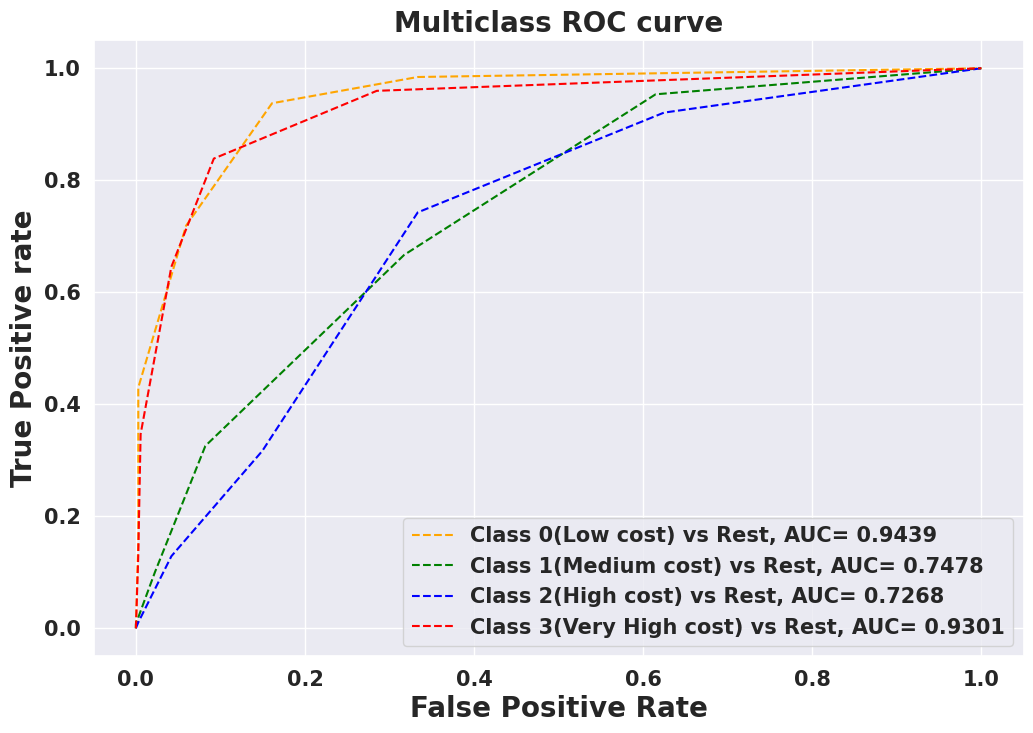

In [177]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)


Let's do some HyperParameter tuning.

In [178]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [179]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [180]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.574 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.502 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.547 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.585 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.576 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.567 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.550 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.522 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.547 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.538 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.578 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [183]:
# getting thge best parameters
knn_tune.best_params_

{'n_neighbors': 26}

In [182]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=29)

In [184]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [185]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.7493074792243767

In [186]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.7136929460580913

In [187]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[116,  12,   0,   0],
       [ 32,  70,  27,   0],
       [  1,  17,  70,  13],
       [  0,   1,  35,  88]])

In [188]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       368
         1.0       0.70      0.59      0.64       350
         2.0       0.64      0.78      0.70       384
         3.0       0.88      0.72      0.79       342

    accuracy                           0.75      1444
   macro avg       0.76      0.75      0.75      1444
weighted avg       0.76      0.75      0.75      1444



In [189]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       128
         1.0       0.70      0.54      0.61       129
         2.0       0.53      0.69      0.60       101
         3.0       0.87      0.71      0.78       124

    accuracy                           0.71       482
   macro avg       0.72      0.71      0.71       482
weighted avg       0.73      0.71      0.71       482



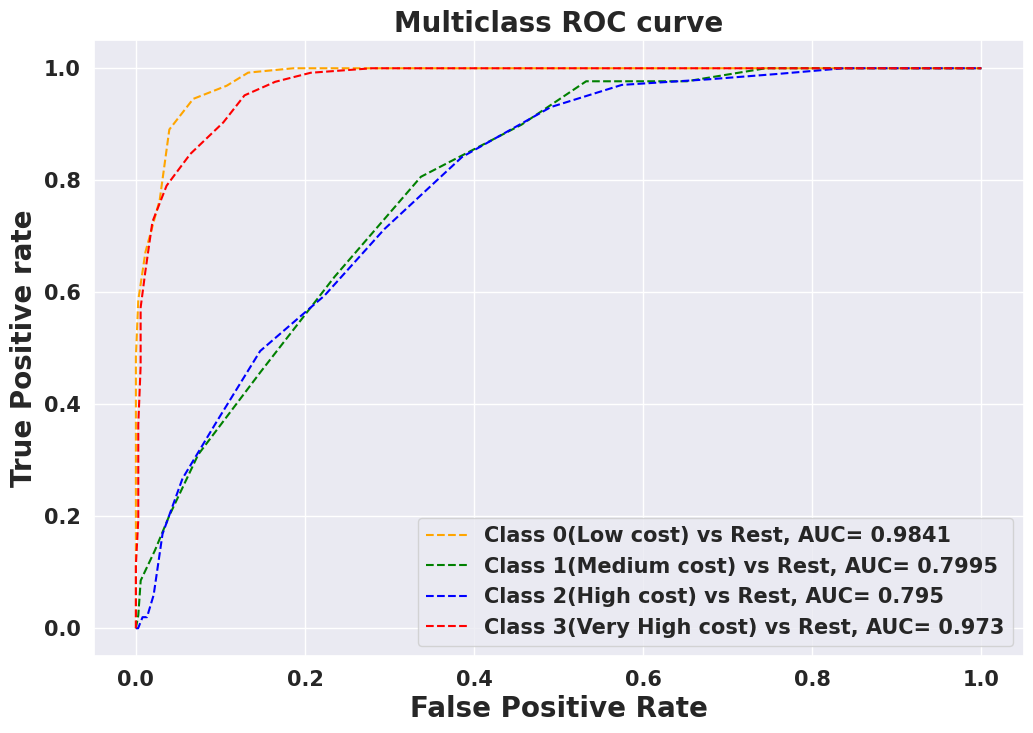

In [190]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

before hyperparameter tuning


*   train accuracy=77
*   test accuracy= 59
 clearly model performed very bad

after hyperparameter tuning

*   train accuracy=75
*   test accuracy=71

surely we have improved the performance but still its not good model for us





#  5) XGBoost Classifier:

With default hyperparameter

In [191]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [192]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [193]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [194]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

1.0

In [195]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.9149377593360996

In [196]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[122,   6,   0,   0],
       [  6, 118,   5,   0],
       [  0,   8,  84,   9],
       [  0,   0,   7, 117]])

In [197]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       350
         2.0       1.00      1.00      1.00       384
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



In [198]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       128
         1.0       0.89      0.91      0.90       129
         2.0       0.88      0.83      0.85       101
         3.0       0.93      0.94      0.94       124

    accuracy                           0.91       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.91      0.91      0.91       482



 train accuracy=100
,test accuracy= 91

Let's Do some Hyperparameter tuning:

In [199]:
# parameter grid values for GridSearchCv
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [200]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.894 total time=   0.4s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.890 total time=   0.3s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.898 total time=   0.3s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.896 total time=   0.3s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.911 total time=   0.3s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.904 total time=   0.3s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.894 total time=   0.6s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.881 total time=   0.6s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [201]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.6}

In [202]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [203]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [204]:
accuracy_score(y_train,y_train_pred)

1.0

In [205]:
accuracy_score(y_test,y_pred)


0.9149377593360996

In [206]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[122,   6,   0,   0],
       [  6, 118,   5,   0],
       [  0,  10,  83,   8],
       [  0,   0,   6, 118]])

In [207]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       368
         1.0       1.00      1.00      1.00       350
         2.0       1.00      1.00      1.00       384
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



In [208]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       128
         1.0       0.88      0.91      0.90       129
         2.0       0.88      0.82      0.85       101
         3.0       0.94      0.95      0.94       124

    accuracy                           0.91       482
   macro avg       0.91      0.91      0.91       482
weighted avg       0.91      0.91      0.91       482



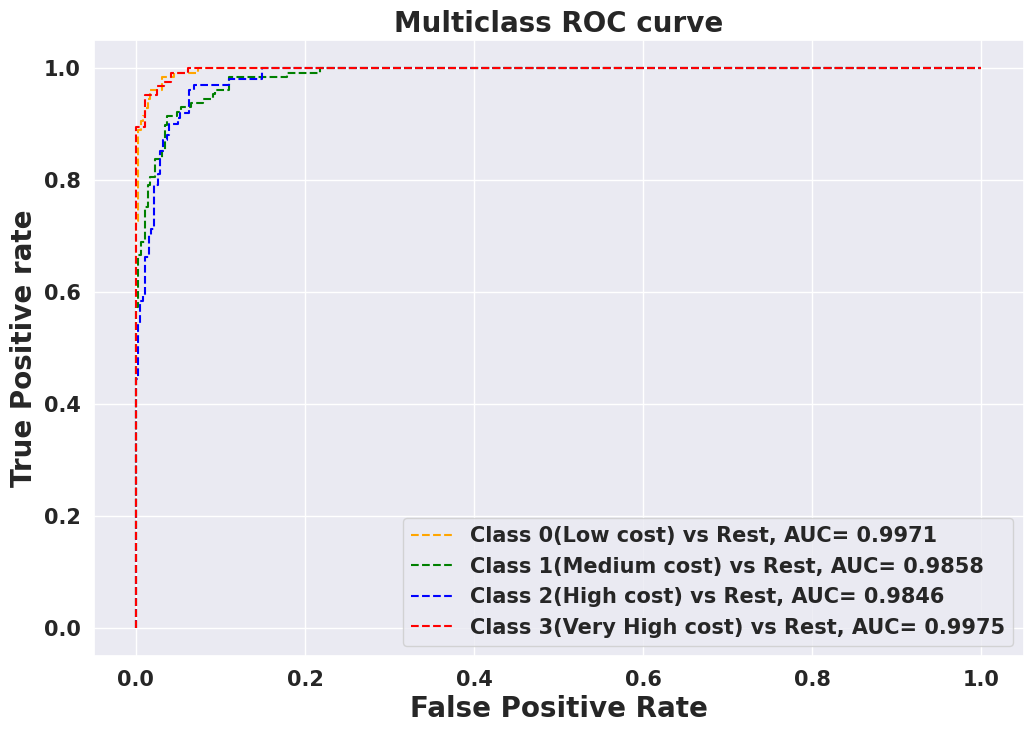

In [209]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

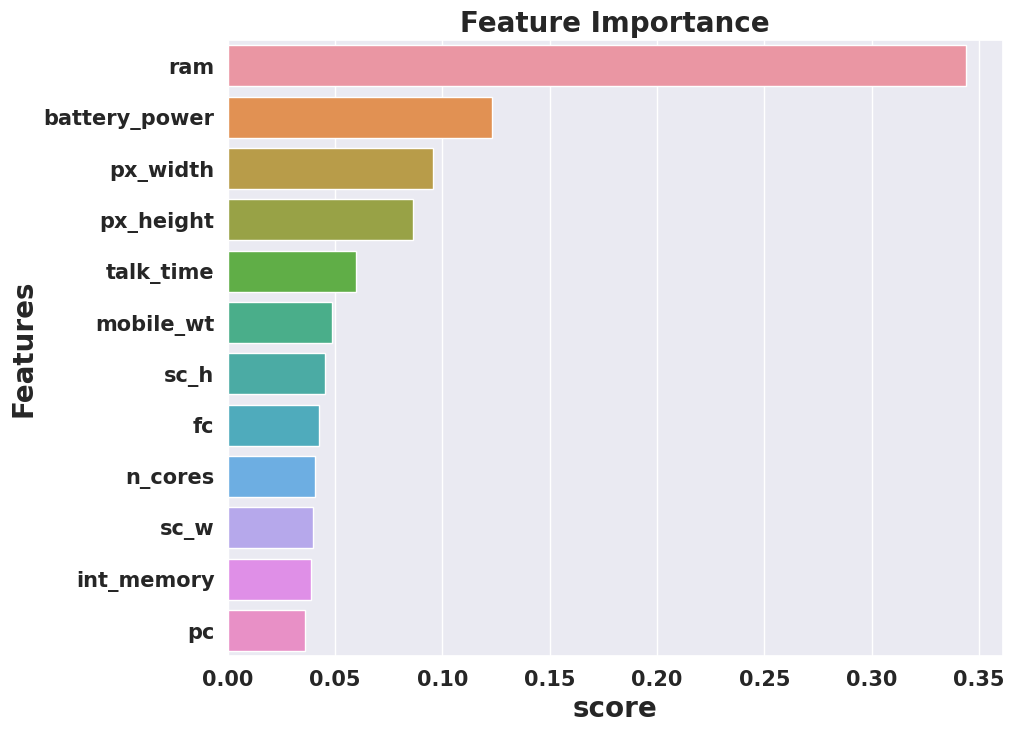

In [210]:
#plotting feature importances
plot_feature_importance(xgb_opti)

Observations

before hyperparameter tuning

*   train=100
*   test=91

after hyperparameter tuning

*   train=100
*   test=91


 still the difference of accuracy score between train and test is more than 5%.We can say model is very slightly overfitted

 From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.



## SVM

with default parameters

In [211]:
# Import all relevant libraries

from sklearn.svm import SVC


In [212]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [213]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)


In [214]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9806094182825484

In [215]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.9024896265560166

In [216]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix


array([[124,   4,   0,   0],
       [ 12, 111,   6,   0],
       [  0,   9,  86,   6],
       [  0,   0,  10, 114]])

In [217]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       368
         1.0       0.98      0.97      0.97       350
         2.0       0.96      0.99      0.97       384
         3.0       1.00      0.97      0.99       342

    accuracy                           0.98      1444
   macro avg       0.98      0.98      0.98      1444
weighted avg       0.98      0.98      0.98      1444



In [218]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       128
         1.0       0.90      0.86      0.88       129
         2.0       0.84      0.85      0.85       101
         3.0       0.95      0.92      0.93       124

    accuracy                           0.90       482
   macro avg       0.90      0.90      0.90       482
weighted avg       0.90      0.90      0.90       482



hyperparameter tuning

In [219]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [220]:
# creating an object for classifier
svm  = SVC ()

In [221]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [222]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [223]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [224]:
# applying best parameters to the svm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [225]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)
y_pred=svm_optimal.predict(X_test_scaled)

In [226]:
y_train_pred


array([0., 3., 1., ..., 2., 0., 2.])

In [227]:
y_pred

array([0., 3., 2., 2., 1., 1., 1., 2., 3., 0., 1., 1., 3., 3., 0., 2., 0.,
       0., 3., 2., 1., 2., 1., 3., 1., 3., 2., 2., 1., 3., 1., 2., 0., 0.,
       0., 0., 2., 3., 1., 3., 3., 0., 2., 1., 0., 0., 0., 1., 0., 3., 1.,
       3., 0., 3., 3., 3., 2., 3., 1., 1., 3., 3., 0., 3., 1., 0., 0., 2.,
       2., 3., 2., 3., 3., 3., 3., 1., 0., 0., 3., 3., 1., 2., 2., 1., 1.,
       0., 1., 3., 1., 1., 3., 3., 3., 3., 3., 1., 1., 2., 3., 2., 1., 1.,
       3., 1., 3., 1., 3., 0., 2., 1., 3., 1., 2., 2., 3., 0., 0., 0., 1.,
       0., 1., 2., 1., 1., 1., 0., 1., 1., 0., 2., 0., 0., 0., 2., 3., 3.,
       0., 3., 2., 1., 2., 0., 0., 3., 1., 0., 3., 1., 1., 1., 2., 0., 0.,
       1., 2., 0., 1., 2., 1., 3., 1., 3., 2., 1., 1., 2., 2., 1., 0., 0.,
       3., 3., 1., 3., 2., 0., 1., 0., 0., 0., 0., 0., 3., 1., 2., 0., 1.,
       0., 2., 3., 1., 3., 2., 1., 0., 0., 1., 3., 0., 0., 2., 1., 3., 0.,
       2., 3., 0., 1., 1., 2., 3., 2., 2., 2., 1., 0., 1., 0., 3., 1., 3.,
       1., 0., 0., 1., 0.

In [228]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9778393351800554

In [229]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.9688796680497925

In [230]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[127,   1,   0,   0],
       [  2, 123,   4,   0],
       [  0,   4,  93,   4],
       [  0,   0,   0, 124]])

In [231]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       368
         1.0       0.97      0.97      0.97       350
         2.0       0.97      0.97      0.97       384
         3.0       0.99      0.98      0.99       342

    accuracy                           0.98      1444
   macro avg       0.98      0.98      0.98      1444
weighted avg       0.98      0.98      0.98      1444



In [232]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       128
         1.0       0.96      0.95      0.96       129
         2.0       0.96      0.92      0.94       101
         3.0       0.97      1.00      0.98       124

    accuracy                           0.97       482
   macro avg       0.97      0.97      0.97       482
weighted avg       0.97      0.97      0.97       482



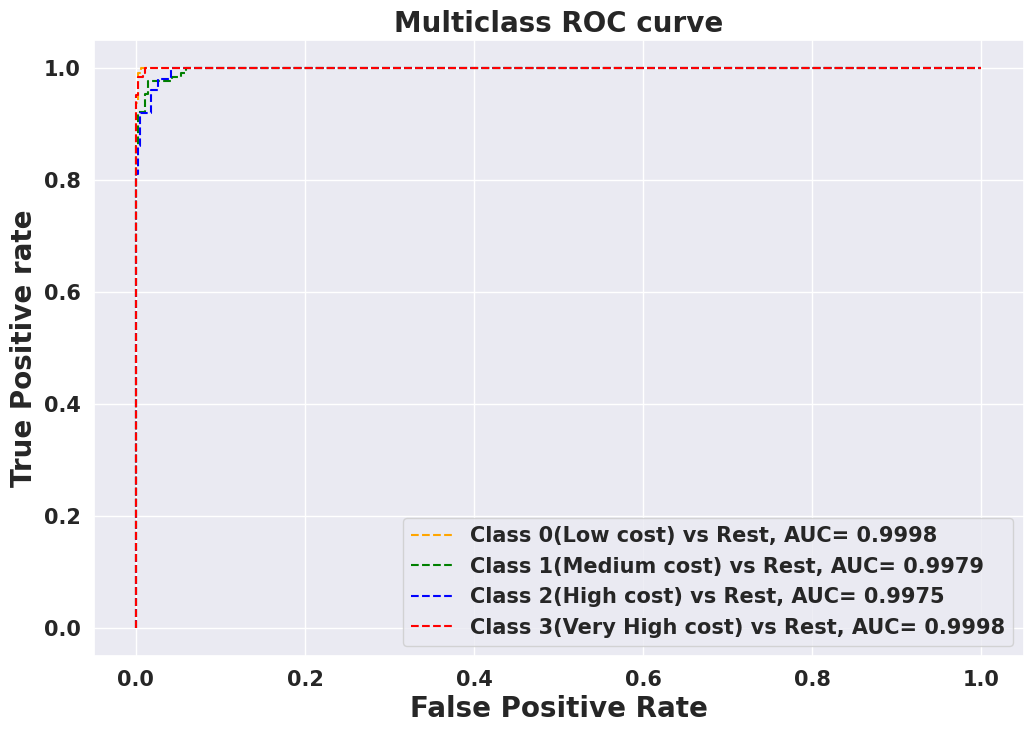

In [233]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

<Axes: >

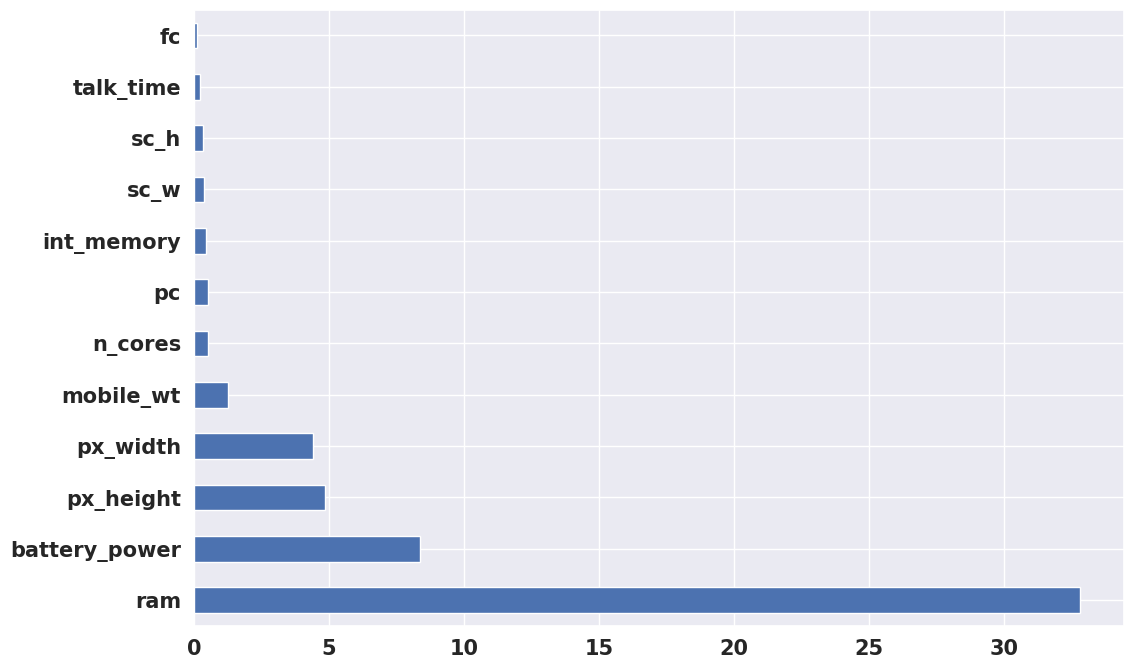

In [235]:
plt.figure(figsize=(12,8))
pd.Series(abs(svm_optimal.coef_[0])+abs(svm_optimal.coef_[1])+abs(svm_optimal.coef_[2])+abs(svm_optimal.coef_[3]), index=X_train.columns).nlargest(12).plot(kind='barh')

##Observations

Accuracy score on train set is 98% and Test score is 90%.


Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.*


After Hyperparameter tuning train accuracy remained almost same 98% and test accuracy score increased to 97%.

SVM performed very well as compared to other alogorithms.

In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.


f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.

conclusion



We Started with Data understanding, data wrangling, basic EDA where we found the relationships, trends between price range and other independent variables.


We selected the best features for predictive modeling by using K best feature selection method using Chi square statistic.

Implemented various classification algorithms, out of which the SVM(Support vector machine) algorithm gave the best performance after hyper-parameter tuning with 98% train accuracy and 97 % test accuracy.



XG boost is the second best good model which gave good performance after hyper-parameter tuning with 100% train accuracy and 92.25% test accuracy score.
KNN gave very worst model performance.



We checked for the feature importance's of each model. RAM, Battery Power, Px_height and px_width contributed the most while predicting the price range.We Started with Data understanding, data wrangling, basic EDA where we found the relationships, trends between price range and other independent variables.
We selected the best features for predictive modeling by using K best feature selection method using Chi square statistic.



Implemented various classification algorithms, out of which the SVM(Support vector machine) algorithm gave the best performance after hyper-parameter tuning with 98.3% train accuracy and 97 % test accuracy.

XG boost is the second best good model which gave good performance after hyper-parameter tuning with 100% train accuracy and 92.25% test accuracy score.
KNN gave very worst model performance.


We checked for the feature importance's of each model. RAM, Battery Power, Px_height and px_width contributed the most while predicting the price range.